####     
####    Code to reproduce results section of the research work: 
   
####    Soil dielectric permittivity modelling for low frequency instrumentation.

####    :AUTHOR: Gaston Mendoza Veirana
####    :CONTACT: gaston.mendozaveirana@ugent.be

####    :REQUIRES: numpy, seaborn, matplotlib, pandas, sklearn, math, random. 'pedophysical_permittivity_models.py' and 'plots.py'

#### This notebook shows the performance of permittivity pedophysical models compiled on pedophysical_permittivity_models.py, as it is explained in the companion paper.


In [1]:
# Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

import pedophysical_permittivity_models as ppm
import pedotransfer_functions as ptf
import plots

pd.set_option('display.max_columns', None)

In [2]:
""" 
######################## Reading calibration curves laboratory data ############################
"""
dt = pd.read_csv("Calibration-curves.csv")
dt

EH2_6_w    A_44_w  VALTHE_N5_w   EH2_3_w    P_17_w  DREN_8_w    E_44_w  \
0   0.394845  0.449688     0.353308  0.444508  0.401432  0.381420  0.359280   
1   0.374201  0.410187     0.348975  0.423674  0.380341  0.340881  0.344189   
2   0.341423  0.361538     0.319046  0.388211  0.312160  0.319307  0.293552   
3   0.327812  0.348587     0.304030  0.359230  0.300705  0.278583  0.285098   
4   0.299109  0.333935     0.282969  0.326915  0.255978  0.261083  0.252280   
5   0.268183  0.298400     0.259892  0.310433  0.235632  0.234989  0.239461   
6   0.231146  0.279054     0.237823  0.285619  0.183650  0.220822  0.201470   
7   0.193368  0.244490     0.224118  0.274508  0.138396  0.200283  0.166569   
8   0.175886  0.207417     0.199026  0.251174  0.085323  0.190005  0.112768   
9   0.171090  0.187180     0.180685  0.233952  0.077978  0.173170  0.104958   
10  0.153146  0.173500     0.169298  0.211267  0.067996  0.159466  0.091512   
11  0.138349  0.130841     0.132818  0.182100  0.058650  0.142909  0.080793   
12  0.121609  0.089802     0.071851  0.162933  0.049305  0.121815  0.069256   
13  0.114035  0.051028     0.057541  0.142656  0.042596  0.110611  0.061537   
14  0.083312  0.026333     0.025495  0.128952  0.034978  0.097757  0.049000   
15  0.076016       NaN     0.020189  0.112082       NaN  0.090535       NaN   
16  0.075664       NaN          NaN  0.101137       NaN  0.083792       NaN   
17  0.060498       NaN          NaN  0.072508       NaN  0.077774       NaN   
18       NaN       NaN          NaN  0.064711       NaN  0.066865       NaN   
19       NaN       NaN          NaN  0.059045       NaN       NaN       NaN   
20       NaN       NaN          NaN  0.056711       NaN       NaN       NaN   
21       NaN       NaN          NaN  0.053915       NaN       NaN       NaN   
22       NaN       NaN          NaN  0.049174       NaN       NaN       NaN   
23       NaN       NaN          NaN  0.047489       NaN       NaN       NaN   
24       NaN       NaN          NaN  0.044785       NaN       NaN       NaN   

     D34_8_w  HULD_586_w  VALTHE_A11_w  EH2_6_p  A_44_p  VALTHE_N5_p  EH2_3_p  \
0   0.289382    0.394174      0.393407   33.851  33.700         20.8   46.400   
1   0.270400    0.356980      0.347099   31.072  33.100         18.2   41.100   
2   0.234752    0.316185      0.335001   28.005  31.100         16.3   39.600   
3   0.217159    0.302247      0.312056   26.714  30.100         13.7   36.000   
4   0.187345    0.283924      0.297287   23.993  28.700         12.3   35.500   
5   0.149659    0.252447      0.278597   20.210  24.458         11.0   33.100   
6   0.096326    0.239684      0.263245   18.096  22.780         10.9   31.600   
7   0.051141    0.206718      0.244722   16.281  19.500          9.8   30.000   
8   0.032993    0.173910      0.233541   14.845  17.400          9.1   29.500   
9   0.016419    0.143293      0.216520   14.950  16.200          8.5   27.943   
10  0.011974    0.096938      0.195744   14.075  15.900          7.7   25.810   
11       NaN    0.064286      0.165206   12.894  13.300          5.8   23.602   
12       NaN    0.042831      0.122736   11.975  10.200          5.0   23.014   
13       NaN    0.030833      0.112223   10.845   7.100          4.0   20.819   
14       NaN         NaN      0.081101    8.972   4.700          3.7   19.706   
15       NaN         NaN      0.052065    8.586     NaN          2.8   18.094   
16       NaN         NaN      0.028571    8.390     NaN          NaN   16.245   
17       NaN         NaN           NaN    7.724     NaN          NaN   13.753   
18       NaN         NaN           NaN      NaN     NaN          NaN   12.338   
19       NaN         NaN           NaN      NaN     NaN          NaN   11.637   
20       NaN         NaN           NaN      NaN     NaN          NaN   10.959   
21       NaN         NaN           NaN      NaN     NaN          NaN   10.606   
22       NaN         NaN           NaN      NaN     NaN          NaN   10.112   
23    

In [3]:
""" 
################################ Reading selected sample analysis ############################
"""
ds = pd.read_csv('Samples_table2.csv')
ds = ds.astype({"Bulk_density_reached": 'float', "Clay": "float", "Silt": "float",
                "Sand": "float", "CEC": "float", "org": "float", "Water_Ph": "float", 
                "Bound_water": "float", "Solid_phase_permittivity": 'float'})

samples = ds['Sample_name'].to_list()[:]                   # List of sample's names

ds

Sample_name   Texture_class  Bulk_density_reached    Clay    Silt    Sand  \
0        A_44  Silty ClayLoam                  1.43  11.034  79.997   8.969   
1      DREN_8       Clay Loam                  1.69  33.046  33.431  33.523   
2       D34_8            Sand                  1.73   2.521   0.360  97.119   
3       EH2_3      Silty Clay                  1.39  38.500  46.700  14.800   
4       EH2_6            Loam                  1.58  16.967  29.198  53.835   
5        E_44            Loam                  1.59  23.233  41.487  35.280   
6    HULD_586      Silty Loam                  1.59  14.700  78.100   7.200   
7        P_17            Loam                  1.56  10.980  43.162  45.858   
8   VALTHE_N5            Sand                  1.60   3.238   2.159  94.604   
9  VALTHE_A11            Sand                  1.58   3.592   2.515  93.893   

     CEC    org  Water_Ph  Bound_water  Solid_phase_permittivity  Alpha  \
0   8.76  0.444      6.62     0.006430                     3.790    NaN   
1  21.70  0.796      8.14     0.011519                     3.800    NaN   
2   1.60  0.418      5.57     0.001478                     3.340    NaN   
3  32.48  1.670      8.30     0.011550                     3.712    NaN   
4  16.01  0.314      8.70     0.428955                     3.480    NaN   
5   9.61  1.012      8.50     0.005491                     3.760    NaN   
6   7.84  0.436     11.20     0.007540                     3.743    NaN   
7   2.42  0.968      6.03     0.005420                     3.630    NaN   
8   1.60  0.244      5.89     0.001708                     3.470    NaN   
9   1.60  0.334      6.16     0.001465                     3.490    NaN   

   m_linde  L_EndresRedman  L_FengSen  L_Wund  L_Sen  bwp_dobson  
0      NaN             NaN        NaN     NaN    NaN         NaN  
1      NaN             NaN        NaN     NaN    NaN         NaN  
2      NaN             NaN        NaN     NaN    NaN         NaN  
3      NaN             NaN        NaN     NaN    NaN         NaN  
4      NaN             NaN        NaN     NaN    NaN         NaN  
5      NaN             NaN        NaN     NaN    NaN         NaN  
6      NaN             NaN        NaN     NaN    NaN         NaN  
7      NaN             NaN        NaN     NaN    NaN         NaN  
8      NaN             NaN        NaN     NaN    NaN         NaN  
9      NaN             NaN        NaN     NaN    NaN         NaN

# Figure 2

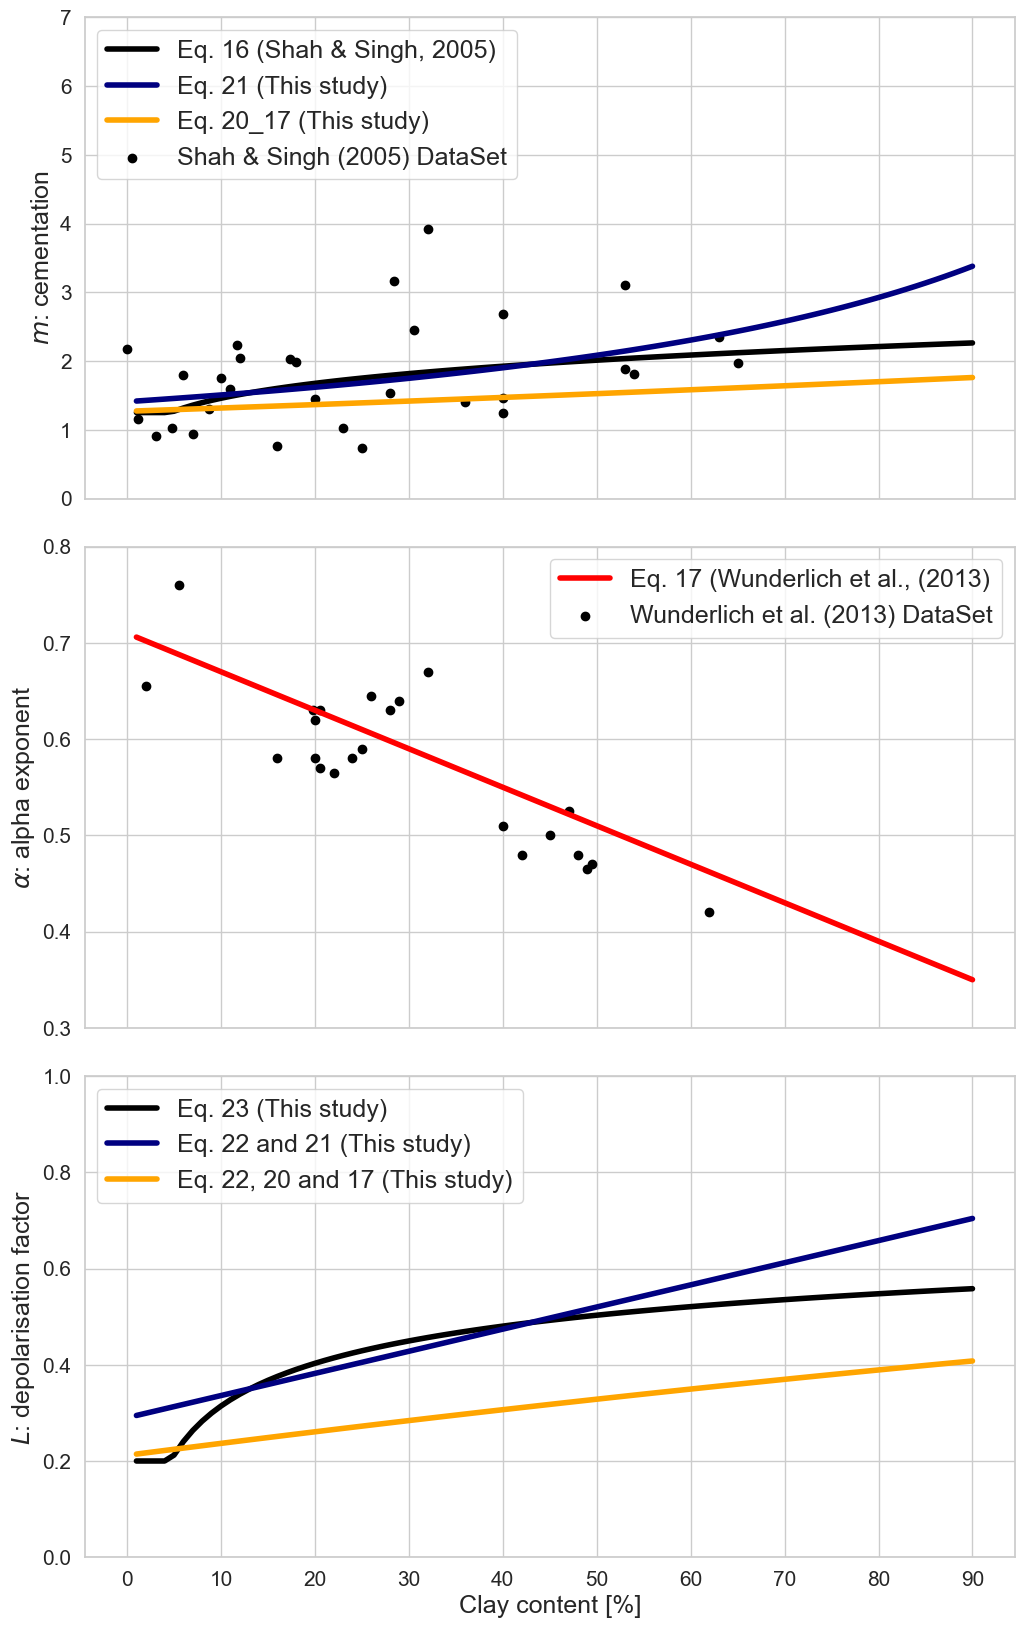

In [26]:
"""                       Geoemtric parameters empirical PTF for high frequency range                    """
dg = pd.read_csv('data_geometric_params.csv')

# Plot
fig, ((a, b, c)) = plt.subplots(3, 1, sharex=True, figsize=(12, 20))
fig.subplots_adjust(hspace=0.1)
lw =     4

# Defining fixed soil parameters
es = 4
ew = 80
pdn = 2.65
offset = 3
bd = 1.7

# Defining soil variables
clay_   = np.arange(1, 91)

######################################       Clay vs m       ##################################### 

m_eq16 = []
for i in clay_:
    m_eq16.append(ptf.eq16(i))

m_eq21 = ptf.eq21(clay_/100)
m_eq20_17 = ptf.eq20_17(clay_/100, bd, pdn, es, ew, offset)

a.plot(clay_, m_eq16,     "-", c = "black",  linewidth=lw, label = "Eq. 16 (Shah & Singh, 2005)")
a.plot(clay_, m_eq21,      "-", c = "navy", linewidth=lw, label = "Eq. 21 (This study)")
a.plot(clay_, m_eq20_17,     "-", c = "orange",   linewidth=lw, label = "Eq. 20_17 (This study)")

a.scatter(dg.clay_shah, dg.m, c = "black", label = "Shah & Singh (2005) DataSet")

##############################    Clay vs Alpha      ##################################### 

alpha_eq17 = ptf.eq17(clay_/100)

b.plot(clay_,  alpha_eq17, "-", c = "red", linewidth=lw, label = "Eq. 17 (Wunderlich et al., (2013)"  )
b.scatter(dg.clay_wund, dg.alpha, c = "black", label = "Wunderlich et al. (2013) DataSet")

######################################      L   vs Clay Content       ##################################### 

L_eq23=[]
for i in clay_:
    L_eq23.append(ptf.eq23(i))

L_eq22_21 = ptf.eq22_21(clay_/100)
L_eq22_20_17 = ptf.eq22_20_17(clay_/100, bd, pdn, es, ew, offset)

c.plot(clay_, L_eq23,     "-", c = "black",       linewidth=lw, label = "Eq. 23 (This study)")
c.plot(clay_, L_eq22_21,      "-", c = "navy",      linewidth=lw, label = "Eq. 22 and 21 (This study)")
c.plot(clay_, L_eq22_20_17,     "-", c = "orange",        linewidth=lw, label = "Eq. 22, 20 and 17 (This study)")

plots.fig2(a, b, c)

plt.savefig("fig2", dpi=300)

# Figure 6

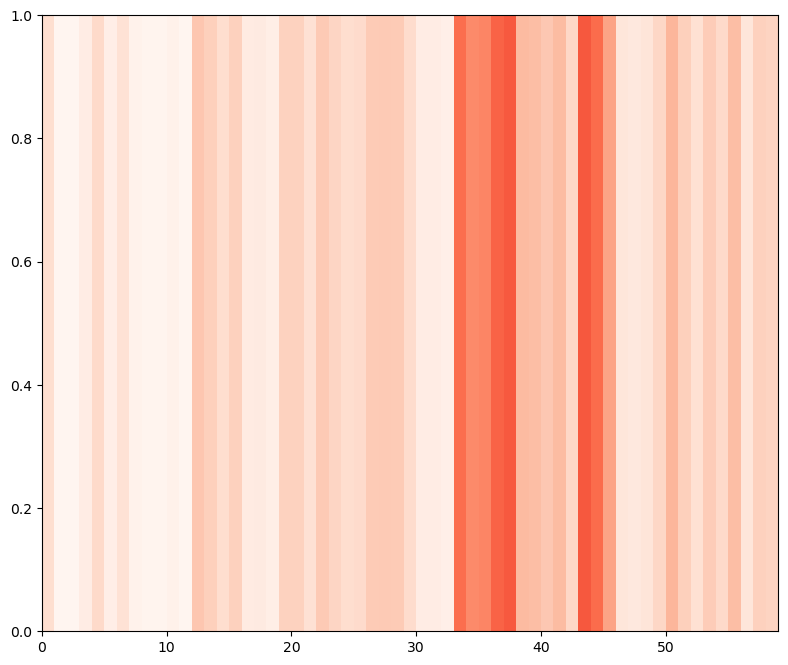

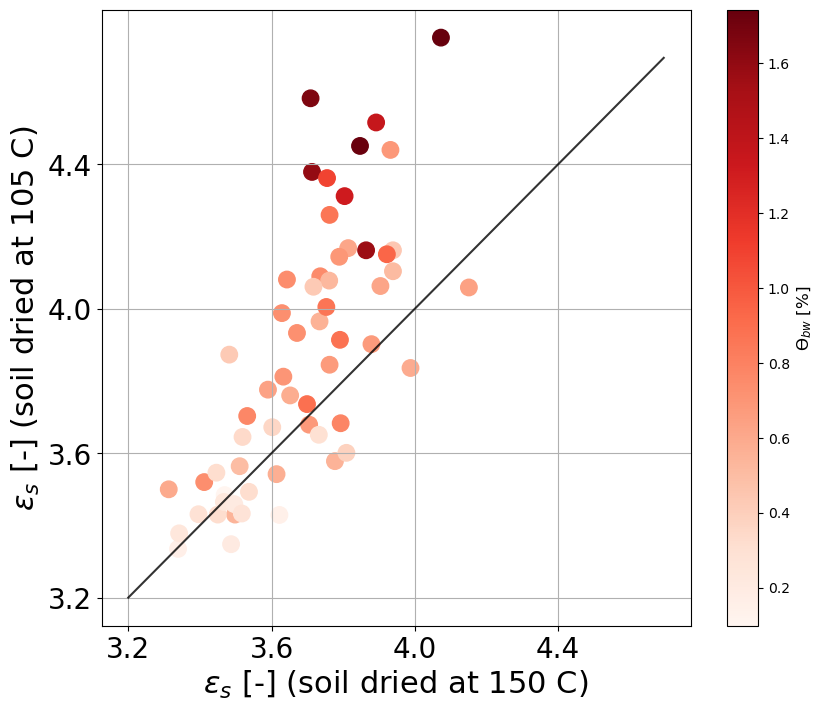

In [5]:
df = pd.read_csv("Field_data.csv")                   # Read the field data

scale = [df.bound_water/np.max(df.bound_water)]
l1_1 =      np.arange(3.2   ,   4.7 , (4.7   - 3.2)    /300)

fig6, ((ax4)) = plt.subplots(1, 1, figsize=(9.5, 8))

pcm = ax4.pcolormesh(scale, vmin=np.min(df.bound_water), vmax=np.max(df.bound_water), cmap='Reds')

fig6, ((ax4)) = plt.subplots(1, 1, figsize=(9.5, 8))

#pcm = ax4.pcolormesh(scale, vmin=np.min(df.bound_water), vmax=np.max(df.bound_water), cmap='Reds')

a = 0.8
s = 140

#pcm = ax4.pcolormesh(scale, vmin=np.min(df.bound_water), vmax=np.max(df.bound_water), cmap='Reds')
ax = fig6.colorbar(pcm, extend="neither", ax=ax4)
ax.set_label('$ϴ_{bw}$ [%]', size='large')

ax4.scatter(df.perm_solid, df.perm_solid_105,              c=scale , cmap = "Reds", s=s)
ax4.plot(l1_1,     l1_1, c="black",  alpha=a, label='1:1 line')

plots.fig6(ax4)
plt.savefig("figure6", dpi=400)

# Figure7

Pearson correlation coeficients: 0.8480256037148144 0.6896140298053817 0.5177186601591859


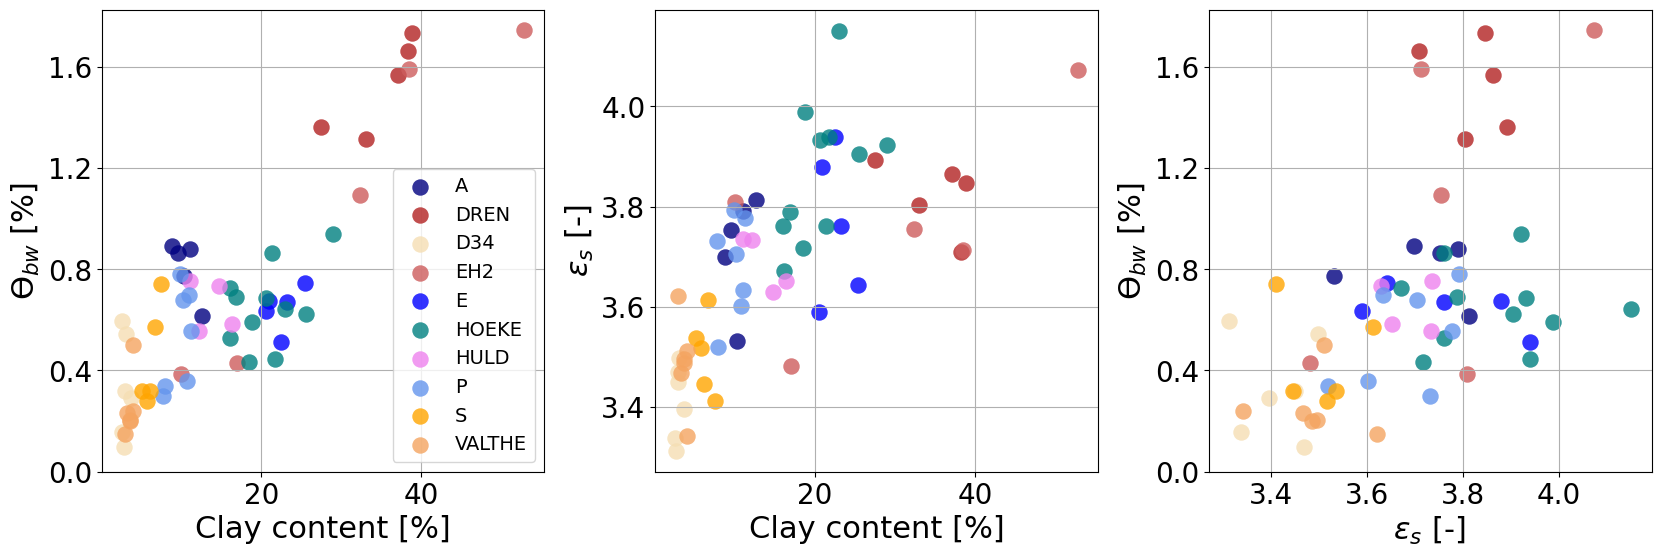

In [6]:
fig7, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20,6))
fig7.subplots_adjust(wspace=0.25)

lw = 0
a = 0.8
s = 140
ms = 10

corr1 = np.corrcoef(df.Clay, df.bound_water)[1,0]
corr2 = np.corrcoef(df.Clay, df.perm_solid)[1,0]
corr3 = np.corrcoef(df.bound_water, df.perm_solid)[1,0]
print('Pearson correlation coeficients:', corr1, corr2, corr3)

ax2.scatter(df.Clay[df['SAMPLE'].str.startswith("A")], df.perm_solid[df['SAMPLE'].str.startswith("A")],alpha=a, s=s, c = 'Navy', linewidth=lw, label= 'A')
ax2.scatter(df.Clay[df['SAMPLE'].str.startswith("DREN")], df.perm_solid[df['SAMPLE'].str.startswith("DREN")],alpha=a, s=s, c = 'Firebrick', linewidth=lw, label= 'DREN')
ax2.scatter(df.Clay[df['SAMPLE'].str.startswith("D34")], df.perm_solid[df['SAMPLE'].str.startswith("D34")],alpha=a, s=s, c = 'wheat', linewidth=lw, label= 'D34')
ax2.scatter(df.Clay[df['SAMPLE'].str.startswith("EH2")], df.perm_solid[df['SAMPLE'].str.startswith("EH2")],alpha=a, s=s, c = 'Indianred', linewidth=lw, label= 'EH2')
ax2.scatter(df.Clay[df['SAMPLE'].str.startswith("E_")], df.perm_solid[df['SAMPLE'].str.startswith("E_")],alpha=a, s=s, c = 'blue', linewidth=lw, label= 'E')
ax2.scatter(df.Clay[df['SAMPLE'].str.startswith("HOEKE")], df.perm_solid[df['SAMPLE'].str.startswith("HOEKE")],alpha=a, s=s, c = 'teal', linewidth=lw, label= 'HOEKE')
ax2.scatter(df.Clay[df['SAMPLE'].str.startswith("HULD")], df.perm_solid[df['SAMPLE'].str.startswith("HULD")], alpha=a, s=s,c = 'violet', linewidth=lw, label= 'HULD')
ax2.scatter(df.Clay[df['SAMPLE'].str.startswith("P")], df.perm_solid[df['SAMPLE'].str.startswith("P")], alpha=a, s=s,c = 'cornflowerblue', linewidth=lw, label= 'P')
ax2.scatter(df.Clay[df['SAMPLE'].str.startswith("S")], df.perm_solid[df['SAMPLE'].str.startswith("S")],alpha=a, s=s, c = 'Orange', linewidth=lw, label= 'S')
ax2.scatter(df.Clay[df['SAMPLE'].str.startswith("V")], df.perm_solid[df['SAMPLE'].str.startswith("V")], alpha=a, s=s,c = 'sandybrown', linewidth=lw, label= 'VALTHE')


ax3.scatter(df.perm_solid[df['SAMPLE'].str.startswith("A")], df.bound_water[df['SAMPLE'].str.startswith("A")], alpha=a, s=s, c = 'Navy', linewidth=lw, label= 'A')
ax3.scatter(df.perm_solid[df['SAMPLE'].str.startswith("DREN")], df.bound_water[df['SAMPLE'].str.startswith("DREN")],  alpha=a, s=s,c = 'Firebrick', linewidth=lw, label= 'DREN')
ax3.scatter(df.perm_solid[df['SAMPLE'].str.startswith("D34")], df.bound_water[df['SAMPLE'].str.startswith("D34")], alpha=a, s=s, c = 'wheat', linewidth=lw, label= 'D34')
ax3.scatter(df.perm_solid[df['SAMPLE'].str.startswith("EH2")], df.bound_water[df['SAMPLE'].str.startswith("EH2")], alpha=a, s=s, c = 'Indianred', linewidth=lw, label= 'EH2')
ax3.scatter(df.perm_solid[df['SAMPLE'].str.startswith("E_")], df.bound_water[df['SAMPLE'].str.startswith("E_")], alpha=a, s=s,c = 'blue', linewidth=lw, label= 'E')
ax3.scatter(df.perm_solid[df['SAMPLE'].str.startswith("HOEKE")], df.bound_water[df['SAMPLE'].str.startswith("HOEKE")], alpha=a, s=s,c = 'teal', linewidth=lw, label= 'HOEKE')
ax3.scatter(df.perm_solid[df['SAMPLE'].str.startswith("HULD")], df.bound_water[df['SAMPLE'].str.startswith("HULD")], alpha=a, s=s,c = 'violet', linewidth=lw, label= 'HULD')
ax3.scatter(df.perm_solid[df['SAMPLE'].str.startswith("P")], df.bound_water[df['SAMPLE'].str.startswith("P")], alpha=a, s=s,c = 'cornflowerblue', linewidth=lw, label= 'P')
ax3.scatter(df.perm_solid[df['SAMPLE'].str.startswith("S")], df.bound_water[df['SAMPLE'].str.startswith("S")], alpha=a, s=s, c = 'Orange', linewidth=lw, label= 'S')
ax3.scatter(df.perm_solid[df['SAMPLE'].str.startswith("V")], df.bound_water[df['SAMPLE'].str.startswith("V")], alpha=a, s=s, c = 'sandybrown', linewidth=lw, label= 'VALTHE')


ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("A")], df.bound_water[df['SAMPLE'].str.startswith("A")],alpha=a, s=s, c = 'Navy', linewidth=lw, label= 'A')
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("DREN")], df.bound_water[df['SAMPLE'].str.startswith("DREN")],alpha=a, s=s, c = 'Firebrick', linewidth=lw, label= 'DREN')
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("D34")], df.bound_water[df['SAMPLE'].str.startswith("D34")],alpha=a, s=s, c = 'wheat', linewidth=lw, label= 'D34')
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("EH2")], df.bound_water[df['SAMPLE'].str.startswith("EH2")],alpha=a, s=s, c = 'Indianred', linewidth=lw, label= 'EH2')
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("E_")], df.bound_water[df['SAMPLE'].str.startswith("E_")],alpha=a, s=s, c = 'blue', linewidth=lw, label= 'E')
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("HOEKE")], df.bound_water[df['SAMPLE'].str.startswith("HOEKE")],alpha=a, s=s, c = 'teal', linewidth=lw, label= 'HOEKE')
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("HULD")], df.bound_water[df['SAMPLE'].str.startswith("HULD")], alpha=a, s=s,c = 'violet', linewidth=lw, label= 'HULD')
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("P")], df.bound_water[df['SAMPLE'].str.startswith("P")], alpha=a, s=s,c = 'cornflowerblue', linewidth=lw, label= 'P')
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("S")], df.bound_water[df['SAMPLE'].str.startswith("S")],alpha=a, s=s, c = 'Orange', linewidth=lw, label= 'S')
ax1.scatter(df.Clay[df['SAMPLE'].str.startswith("V")], df.bound_water[df['SAMPLE'].str.startswith("V")], alpha=a, s=s,c = 'sandybrown', linewidth=lw, label= 'VALTHE')

plots.fig7(ax2, ax3, ax1)

plt.savefig("figure7", dpi=400)

# Figure 8

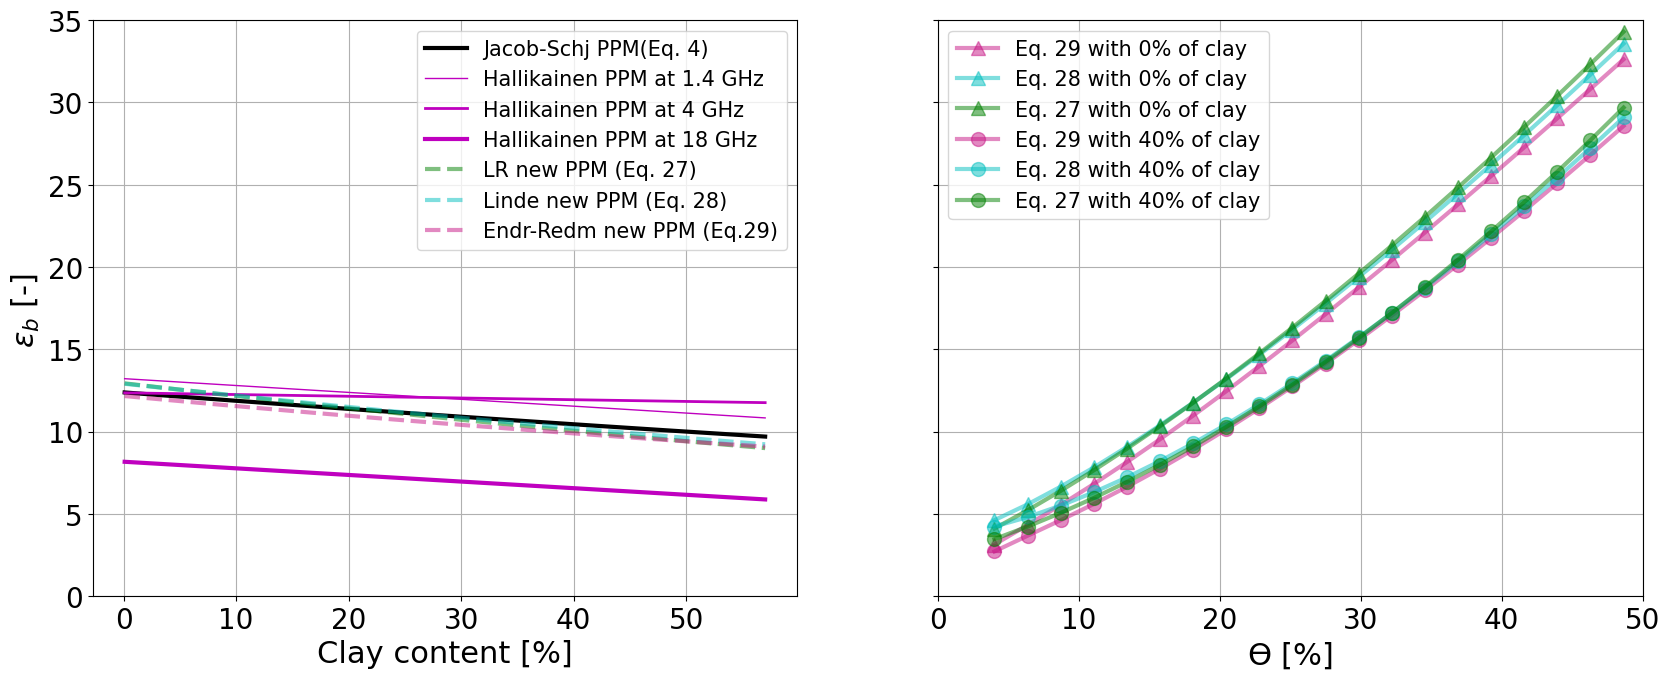

In [7]:
"""                       PPM's evaluation high frequency                   """
# Varying soil properties
vmc_ = np.arange(0.04, .5 ,  (.5 - 0.03) /20)  # Volumetric water content
cc_  = np.arange(0.1, 60 , (60 - 0.1)/20)    # Clay content

# Fixed soil properties
bd = 1.5
wp = 80
offset = 3
sp = 3.7
ap = 1
pdn = 2.65
vmc = 0.2
sand = 0
clay = 40
sc = 80
org = 1

# Evaluating PPMs for high frequency range
jacandschjB_cc =    [ppm.jacandschjB(vmc, bd, cc_[0] + (cc_[1]-cc_[0])*i, org) for i in range(len(cc_))]
hallikainen1_4_cc =  ppm.hallikainen_1_4(vmc,  cc_, sc                      )
hallikainen4_cc =    ppm.hallikainen_4(  vmc,  cc_, sc                      )
hallikainen18_cc =   ppm.hallikainen_18( vmc,  cc_, sc                      )
LR_eq25_cc =       ppm.LR_high_freq(vmc, bd, pdn, cc_, ap, sp, wp)
linde_eq30_cc =      ppm.linde_high_freq(vmc, bd, pdn, cc_, ap, sp, wp, offset)
endres_redman_eq41_cc = ppm.endres_redman_high_freq(vmc, bd, pdn, cc_, ap, sp, wp, offset)

LR_eq25_sand =          ppm.LR_high_freq(vmc_, bd, pdn, sand, ap, sp, wp)
linde_eq30_sand =         ppm.linde_high_freq(vmc_, bd, pdn, sand, ap, sp, wp, offset)
endres_redman_eq41_sand = ppm.endres_redman_high_freq(vmc_, bd, pdn, sand, ap, sp, wp, offset)

LR_eq25_clay =          ppm.LR_high_freq(vmc_, bd, pdn, clay, ap, sp, wp)
linde_eq30_clay =         ppm.linde_high_freq(vmc_, bd, pdn, clay, ap, sp, wp, offset)
endres_redman_eq41_clay = ppm.endres_redman_high_freq(vmc_, bd, pdn, clay, ap, sp, wp, offset)

"""                       Plotting Figure 8                     """

fig8, ((p1, p2)) = plt.subplots(1, 2, sharey= True, figsize=(20,8))
fig8.subplots_adjust(hspace=0.05)

lw = 2
aa = 0.5
ms= 10

p2.plot(vmc_*100, endres_redman_eq41_sand, "-" , color = "mediumvioletred", markersize=ms,marker='^', alpha = aa, linewidth=lw+1, label = "Eq. 29 with 0% of clay")
p2.plot(vmc_*100, linde_eq30_sand,         "c-",    marker='^',   markersize=ms,  alpha = aa, linewidth=lw+1, label = "Eq. 28 with 0% of clay")
p2.plot(vmc_*100, LR_eq25_sand,          "g-",    marker='^',   markersize=ms,  alpha = aa, linewidth=lw+1, label = "Eq. 27 with 0% of clay")

p2.plot(vmc_*100, endres_redman_eq41_clay, "-" , color = "mediumvioletred", markersize=ms, marker='o', alpha = aa, linewidth=lw+1, label = "Eq. 29 with 40% of clay")
p2.plot(vmc_*100, linde_eq30_clay,         "c-", markersize=ms,     marker='o', alpha = aa, linewidth=lw+1, label = "Eq. 28 with 40% of clay")
p2.plot(vmc_*100, LR_eq25_clay ,         "g-", markersize=ms,     marker='o', alpha = aa, linewidth=lw+1, label = "Eq. 27 with 40% of clay")

p1.plot(cc_, jacandschjB_cc,    "k-", linewidth=lw+1, label = "Jacob-Schj PPM(Eq. 4)")
p1.plot(cc_, hallikainen1_4_cc, "m-", linewidth=1, label = "Hallikainen PPM at 1.4 GHz")
p1.plot(cc_, hallikainen4_cc,   "m-", linewidth=2, label = "Hallikainen PPM at 4 GHz")
p1.plot(cc_, hallikainen18_cc,  "m-", linewidth=3, label = "Hallikainen PPM at 18 GHz")
p1.plot(cc_, LR_eq25_cc,      "g--", alpha = aa, linewidth=lw+1, label = "LR new PPM (Eq. 27)")
p1.plot(cc_, linde_eq30_cc,     "c--", alpha = aa, linewidth=lw+1, label = "Linde new PPM (Eq. 28)")
p1.plot(cc_, endres_redman_eq41_cc, "--" , color = "mediumvioletred",  alpha = aa, linewidth=lw+1, label = "Endr-Redm new PPM (Eq.29)")

plt.subplots_adjust(bottom=0.16)
plots.fig8(p1, p2)

plt.savefig("figure8", dpi=400)

# Figure 9

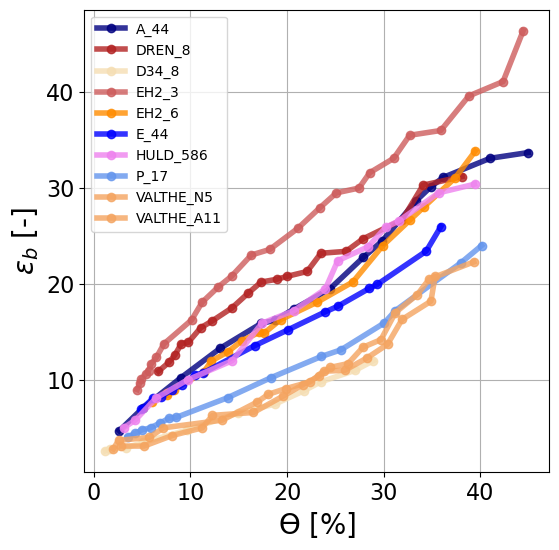

In [8]:
""""Ploting calibration curves for visualization"""
lw = 4                         # Plot parameter: line width
aa = 0.8                      # Plot parameter: alpha 
fig9, ((ax9)) = plt.subplots(1, 1, figsize=(6, 6))

ax9.plot(dt.A_44_w*100,      dt.A_44_p,       c = "navy",           marker="o", alpha=aa, linewidth=lw, label= 'A_44')
ax9.plot(dt.DREN_8_w*100,    dt.DREN_8_p,     c = 'firebrick',      marker="o", alpha=aa, linewidth=lw, label= 'DREN_8')
ax9.plot(dt.D34_8_w*100,     dt.D34_8_p,      c = "wheat",          marker="o", alpha=aa, linewidth=lw, label= 'D34_8')
ax9.plot(dt.EH2_3_w*100,     dt.EH2_3_p,      c = 'indianred',      marker="o", alpha=aa, linewidth=lw, label= 'EH2_3')
ax9.plot(dt.EH2_6_w*100,     dt.EH2_6_p,      c = "darkorange",     marker="o", alpha=aa, linewidth=lw, label= 'EH2_6')
ax9.plot(dt.E_44_w*100,      dt.E_44_p,       c = "blue",           marker="o", alpha=aa, linewidth=lw, label= 'E_44')
ax9.plot(dt.HULD_586_w*100,   dt.HULD_586_p,  c = "violet",         marker="o", alpha=aa, linewidth=lw, label= 'HULD_586')
ax9.plot(dt.P_17_w*100,       dt.P_17_p,       c = "cornflowerblue", marker="o", alpha=aa, linewidth=lw, label= 'P_17')
ax9.plot(dt.VALTHE_N5_w*100,  dt.VALTHE_N5_p, c = "sandybrown",     marker="o", alpha=aa, linewidth=lw, label= 'VALTHE_N5')
ax9.plot(dt.VALTHE_A11_w*100, dt.VALTHE_A11_p,c = "sandybrown",     marker="o", alpha=aa, linewidth=lw, label= 'VALTHE_A11')

plots.fig9(ax9)
plt.savefig("fig9", dpi=400)

In [9]:
""" Calculating water permittivity phase based on Malmberg & Maryott model (Eq. 13) """
dt["EH2_6_wpc"]      = ppm.malmberg_maryott(dt.EH2_6_t      )
dt["A_44_wpc"]       = ppm.malmberg_maryott(dt.A_44_t       )
dt["VALTHE_N5_wpc"]   = ppm.malmberg_maryott(dt.VALTHE_N5_t   )
dt["EH2_3_wpc"]      = ppm.malmberg_maryott(dt.EH2_3_t      )
dt["P_17_wpc"]       = ppm.malmberg_maryott(dt.P_17_t       )
dt["DREN_8_wpc"]     = ppm.malmberg_maryott(dt.DREN_8_t     )
dt["E_44_wpc"]       = ppm.malmberg_maryott(dt.E_44_t       )
dt["D34_8_wpc"]      = ppm.malmberg_maryott(dt.D34_8_t      )
dt["HULD_586_wpc"]    = ppm.malmberg_maryott(dt.HULD_586_t    )
dt["VALTHE_A11_wpc"]  = ppm.malmberg_maryott(dt.VALTHE_A11_t  )

In [10]:
"""
################################## PERMITTIVITY PEDOPHYSICAL MODELS EVALUATION ##################################
"""

"""  Defining a DataFrame to fill out with model's errors, considering both RMSE and R2 score.  """ 

PPM_list = [## Empirical PPMs
             "Topp (Eq. 3)", "Jac-SchjA (Eq. 4)", "HydraProbe (Eq. 25)",  
             "Nadler (Eq. A1)",  "Jac-SchjB (Eq. A2)", "Malicki (Eq. A3)", "Steel-Endr (Eq. A4)", "Logsdon (Eq. A5)",  
            
            ## Fixed parameter PPMs
             "CRIM (Eq. 6)", "Linde (Eq. 8)", "Wunderlich (Eq. 10)", "Endr-Redm (Eq. 12)",  
             "Peplinski (Eq. A6)",  "Sen (Eq. A9)", "Feng-Sen (Eq. A11)", 
            
            ## Fitted parameter PPMs
           "LR (Eq. 5)", "Linde (Eq. 7)", "Wunderlich (Eq. 9)", "Endr-Redm (Eq. 11)",   
           'Dobson (Eq. A7)', "Sen (Eq. A8)", "Feng-Sen (Eq. A10)",

            ## New pre-fitted PPMs (this study)
             "LR (Eq. 36)", "Linde (Eq. 37)", "Wunderlich (Eq. 38)", 
             "Endr-Redm (Eq. 39)", "Sen (Eq. 40)", "Feng-Sen (Eq. 41)"    ]    

RMSE= pd.DataFrame( index = PPM_list )
                    
R2= pd.DataFrame( index = PPM_list )


""" 
Defining a few fix parameters 
"""
ap =       1.3                                              # Air permittivity phase
p_inf =    3.5                                              # Permittivity relative of the soil at infinity frecuency

"""
Defining varying soil properties

"""
vmc_ =           np.arange(0.0025, .5 , (.5 - 0.0025)/100)  # Volumetric water content
alpha_ =         np.arange(0.01,   1.5, (1.5-0.01 )  /100)  # All posible alpha values (geometric parameter)
m_ =             np.arange(0.5,   2,    (2 - 0.5)    /100)  # All posible cementation factor (m) values (geometric parameter)
bwp_ =           np.arange(-5000, 2000, 7000         /100)  # All posible bound water values 
L_ =             np.arange(-0.2,  0.8,  (1)          /50 )  # All posible depolarization factor (L) values (geometric parameter)
Lw_ =            np.arange(-0.1,  0.2,  (0.3)        /50 )  # All posible depolarization factor (Lw) values (geometric parameter)

s = 0
for sample in samples:                                      # This iterates over the ten samples       
    
    ############################## Reading some parameters for each soil sample ######################
    
    print("Sample:", sample)
    sc =      ds.at[s, "Sand"]                       # SAND content (63 - 2000 * e-6 meters) (%)
    silt =    ds.at[s, "Silt"]                       # SILT content (%)
    cc  =     ds.at[s, "Clay"]                       # CLAY content (0  - 2    * e-6 meters) %[m3/m3]
    bd =      ds.at[s, "Bulk_density_reached"]       # Bulk density reached during the laboratory sample preparation the same as measured in field conditions.
    ps =      ds.at[s, "Solid_phase_permittivity"]   # Solid phase permittivity calculated using Eq. 14, after experiment.
    org =     ds.at[s, "org"]                        # Organic matter content 
    bw =      ds.at[s, "Bound_water"]                # Bound water, after experiment [m3/m3]  
    CEC =     ds.at[s, "CEC"]                        # Cation Exchange Capacity [meq/100g]

    pdn =     ptf.schjonnpd(cc, org)                 # partile density of layer(s) (g/cm³)

    ################################  Fitting models evaluation ######################################
   
    etot =    np.sum((dt.loc[:, sample+"_p"]-np.mean(dt.loc[:, sample+"_p"]))**2)   # Total sum of squares
    LR_RMSE, LindeP_RMSE, EndresRedman_RMSE, FengSen_RMSE, Wund_RMSE, Sen_RMSE, Dobson_RMSE = [], [], [], [], [], [], [] # Definition of lists
    CRIM_pred_, LR_mv_ = [], []
    
    """ LR PPM evaluation """
    for i in range(len(alpha_)):
        
        LR_RMSE.append(np.sqrt(np.mean((ppm.LR( dt.loc[:, sample+"_w"], bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], alpha_[i])-dt.loc[:, sample+"_p"])**2)))    

    LR_RMSE_min = min(LR_RMSE)
    alpha_fitted = alpha_[LR_RMSE.index(LR_RMSE_min)]
    
    LR_fitted = ppm.LR( dt.loc[:, sample+"_w"], bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], alpha_fitted)
    RMSE.at["LR (Eq. 5)", "RMSE_"+sample] = LR_RMSE_min
    R2.at["LR (Eq. 5)", "R2_"+sample] =   1 - (np.sum((LR_fitted-dt.loc[:, sample+"_p"])**2)/etot)
    ds.at[s, "Alpha"] = alpha_fitted
    print("The optimum Alpha is:", alpha_fitted)
    
    
    """ Linde's model"""
    for i in range(len(m_)):
        LindeP_RMSE.append(np.sqrt(np.mean((ppm.linde(dt.loc[:, sample+"_w"], bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], m_[i], m_[i])-dt.loc[:, sample+"_p"])**2)))

    m_fitted = m_[LindeP_RMSE.index(min(LindeP_RMSE))]
    
    LindeP_fitted = ppm.linde(dt.loc[:, sample+"_w"], bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], m_fitted, m_fitted)
    RMSE.at["Linde (Eq. 7)", "RMSE_"+sample] = min(LindeP_RMSE)
    R2.at["Linde (Eq. 7)", "R2_"+sample]   = 1 - (np.sum((LindeP_fitted-dt.loc[:, sample+"_p"])**2)/etot)
    ds.at[s, "m_linde"] = m_fitted
    print("The optimum m is:", m_fitted)
    
    
    """ Dobson's model"""
    for i in range(len(bwp_)):
        
        Dobson_RMSE.append(np.sqrt(np.mean((ppm.dobson(dt.loc[:, sample+"_w"], bw, bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], bwp_[i]) -dt.loc[:, sample+"_p"])**2)))

    bwp_fitted = bwp_[Dobson_RMSE.index(min(Dobson_RMSE))]
    
    Dobson_fitted = ppm.dobson(dt.loc[:, sample+"_w"], bw, bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], bwp_fitted)
    RMSE.at["Dobson (Eq. A7)", "RMSE_"+sample] = min(Dobson_RMSE)
    R2.at["Dobson (Eq. A7)", "R2_"+sample] =   1 - (np.sum((Dobson_fitted-dt.loc[:, sample+"_p"])**2)/etot)
    ds.at[s, "bwp_dobson"] = bwp_fitted
    print("The optimum bwp is:", bwp_fitted)
    
    
    """ Embedding schemes evaluation"""
    for i in range(len(L_)):
        
        Sen_RMSE.append(np.sqrt(np.mean((ppm.sen(dt.loc[:, sample+"_w"], bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], L_[i] )-dt.loc[:, sample+"_p"])**2)))        
        FengSen_RMSE.append(np.sqrt(np.mean((ppm.feng_sen(dt.loc[:, sample+"_w"], bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], L_[i] )-dt.loc[:, sample+"_p"])**2)))
        EndresRedman_RMSE.append(np.sqrt(np.mean((ppm.endres_redman(dt.loc[:, sample+"_w"], bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], L_[i] )-dt.loc[:, sample+"_p"])**2)))
        Wund_RMSE.append(np.sqrt(np.mean((ppm.wunderlich(dt.loc[:, sample+"_w"], dt.loc[:, sample+"_p"].min(), dt.loc[:, sample+"_w"].min(), dt.loc[:, sample+"_wpc"], Lw_[i])-dt.loc[:, sample+"_p"])**2)))
    
    RMSE.at["Sen (Eq. A8)", "RMSE_"+sample]        = min(Sen_RMSE)  
    RMSE.at["Feng-Sen (Eq. A10)", "RMSE_"+sample]      = min(FengSen_RMSE)    
    RMSE.at["Endr-Redm (Eq. 11)", "RMSE_"+sample] = min(EndresRedman_RMSE)
    RMSE.at["Wunderlich (Eq. 9)", "RMSE_"+sample]       = min(Wund_RMSE)
    
    L_fitted_Sen        = L_[Sen_RMSE.index(min(Sen_RMSE))]
    L_fitted_FengSen      = L_[FengSen_RMSE.index(min(FengSen_RMSE))]
    L_fitted_EndresRedman = L_[EndresRedman_RMSE.index(min(EndresRedman_RMSE))]
    L_fitted_Wund       = Lw_[Wund_RMSE.index(min(Wund_RMSE))]

    Sen_fitted = ppm.sen(           dt.loc[:, sample+"_w"], bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], L_fitted_Sen)
    FengSen_fitted = ppm.feng_sen(       dt.loc[:, sample+"_w"], bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], L_fitted_FengSen)
    EndresRedman_fitted = ppm.endres_redman(  dt.loc[:, sample+"_w"], bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], L_fitted_EndresRedman)
    Wund_fitted = ppm.wunderlich(dt.loc[:, sample+"_w"], dt.loc[:, sample+"_p"].min(), dt.loc[:, sample+"_w"].min(), dt.loc[:, sample+"_wpc"], L_fitted_Wund)

    R2.at["Sen (Eq. A8)", "R2_"+sample]         = 1 - (np.sum((Sen_fitted       -dt.loc[:, sample+"_p"])**2)/etot)
    R2.at["Feng-Sen (Eq. A10)", "R2_"+sample]    = 1 - (np.sum((FengSen_fitted     -dt.loc[:, sample+"_p"])**2)/etot)
    R2.at["Endr-Redm (Eq. 11)", "R2_"+sample]   = 1 - (np.sum((EndresRedman_fitted-dt.loc[:, sample+"_p"])**2)/etot)
    R2.at["Wunderlich (Eq. 9)", "R2_"+sample]  = 1 - (np.sum((Wund_fitted      -dt.loc[:, sample+"_p"])**2)/etot)                

    ds.at[s, "L_Sen"] = L_fitted_Sen    
    ds.at[s, "L_FengSen"] = L_fitted_FengSen
    ds.at[s, "L_EndresRedman"] = L_fitted_EndresRedman
    ds.at[s, "L_Wund"] = L_fitted_Wund
    
    
    ####################################### Non-fitting models evaluation ################################

    length = pd.notna(dt.loc[:,sample+"_w"]).sum()
    
    CRIM_pred, Peplinski95_pred, Malicki_pred= [], [], [], 
    FengSen_Mod_pred, LR_Mod_pred, LindeP_Mod_pred, Sen_Mod_pred, Dobson_mod_pred, EndresRedman_mod_pred, Wund_mod_pred = [], [], [], [], [], [], []
    
    EndresRedman = ppm.endres_redman(  dt.loc[:, sample+"_w"], bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], 0.3)
    FengSen = ppm.feng_sen(       dt.loc[:, sample+"_w"], bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"],  0.3)
    Wund = ppm.wunderlich(dt.loc[:, sample+"_w"], 4, 0.05, dt.loc[:, sample+"_wpc"],  0.01)
    Sen = ppm.sen(           dt.loc[:, sample+"_w"], bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"],  0.3)
    LindeP = ppm.linde(dt.loc[:, sample+"_w"], bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], 1.5, 2)

    R2.at["Feng-Sen (Eq. A11)", "R2_"+sample] =      1 - (np.sum((FengSen-dt.loc[:, sample+"_p"])**2)/etot)
    R2.at["Linde (Eq. 8)", "R2_"+sample] =       1 - (np.sum((LindeP - dt.loc[:, sample+"_p"])**2)/etot)
    R2.at["Sen (Eq. A9)", "R2_"+sample] =        1 - (np.sum((Sen - dt.loc[:, sample+"_p"])**2)/etot)
    R2.at["Endr-Redm (Eq. 12)", "R2_"+sample] = 1 - (np.sum((EndresRedman-dt.loc[:, sample+"_p"])**2)/etot)
    R2.at["Wunderlich (Eq. 10)", "R2_"+sample] =       1 - (np.sum((Wund-dt.loc[:, sample+"_p"])**2)/etot)
    
    RMSE.at["Feng-Sen (Eq. A11)", "RMSE_"+sample] =      np.sqrt(np.mean((FengSen - dt.loc[:, sample+"_p"])**2))
    RMSE.at["Linde (Eq. 8)", "RMSE_"+sample] =       np.sqrt(np.mean((LindeP - dt.loc[:, sample+"_p"])**2))
    RMSE.at["Sen (Eq. A9)", "RMSE_"+sample] =        np.sqrt(np.mean((Sen - dt.loc[:, sample+"_p"])**2))
    RMSE.at["Endr-Redm (Eq. 12)", "RMSE_"+sample] = np.sqrt(np.mean((EndresRedman - dt.loc[:, sample+"_p"])**2))
    RMSE.at["Wunderlich (Eq. 10)", "RMSE_"+sample] =       np.sqrt(np.mean((Wund - dt.loc[:, sample+"_p"])**2))

    Hydra = ppm.hydraprobe(      dt.loc[:, sample+"_w"]  )
    Topp =  [ppm.topp(dt.loc[i, sample+"_w"]) for i in range(length)]
    Jac_SchjB =  [ppm.jacandschjB( dt.loc[i, sample+"_w"], bd, cc, org  )  for i in range(length)]
    Nadler = [ppm.nadler(  dt.loc[i, sample+"_w"]  ) for i in range(length)]
    Logsdon = [ppm.logsdonperm(  dt.loc[i, sample+"_w"] ) for i in range(length)]
    Steelman = [ppm.steelman(     dt.loc[i, sample+"_w"]  ) for i in range(length)]
    Jac_SchjA = [ppm.jacandschjA(     dt.loc[i, sample+"_w"] ) for i in range(length)]

    RMSE.at["HydraProbe (Eq. 25)", "RMSE_"+sample]  =          np.sqrt(np.mean((Hydra - dt.loc[:, sample+"_p"])**2))
    RMSE.at["Topp (Eq. 3)",  "RMSE_"+sample] =           np.sqrt(np.mean(( Topp - dt.loc[:length-1, sample+"_p"])**2))
    RMSE.at["Jac-SchjB (Eq. A2)", "RMSE_"+sample] = np.sqrt(np.mean(( Jac_SchjB - dt.loc[:length-1, sample+"_p"])**2))
    RMSE.at["Nadler (Eq. A1)", "RMSE_"+sample] =          np.sqrt(np.mean(( Nadler - dt.loc[:length-1, sample+"_p"])**2))
    RMSE.at["Logsdon (Eq. A5)", "RMSE_"+sample] =     np.sqrt(np.mean(( Logsdon - dt.loc[:length-1, sample+"_p"])**2))
    RMSE.at["Steel-Endr (Eq. A4)", "RMSE_"+sample] =        np.sqrt(np.mean(( Steelman - dt.loc[:length-1, sample+"_p"])**2))
    RMSE.at["Jac-SchjA (Eq. 4)", "RMSE_"+sample] = np.sqrt(np.mean(( Jac_SchjA - dt.loc[:length-1, sample+"_p"])**2))
    
    R2.at["HydraProbe (Eq. 25)", "R2_"+sample]  =          1 - (np.sum((Hydra-dt.loc[:, sample+"_p"])**2)/etot)                                               
    R2.at["Topp (Eq. 3)",  "R2_"+sample] =           1 - (np.sum((Topp-dt.loc[:length-1, sample+"_p"])**2)/etot)
    R2.at["Jac-SchjB (Eq. A2)", "R2_"+sample] = 1 - (np.sum((Jac_SchjB-dt.loc[:length-1, sample+"_p"])**2)/etot)
    R2.at["Nadler (Eq. A1)", "R2_"+sample] =          1 - (np.sum((Nadler-dt.loc[:length-1, sample+"_p"])**2)/etot)
    R2.at["Logsdon (Eq. A5)", "R2_"+sample] =     1 - (np.sum((Logsdon-dt.loc[:length-1, sample+"_p"])**2)/etot)
    R2.at["Steel-Endr (Eq. A4)", "R2_"+sample] =        1 - (np.sum((Steelman-dt.loc[:length-1, sample+"_p"])**2)/etot)
    R2.at["Jac-SchjA (Eq. 4)", "R2_"+sample] = 1 - (np.sum((Jac_SchjA-dt.loc[:length-1, sample+"_p"])**2)/etot)

    CRIM_pred = ppm.CRIM(            dt.loc[:, sample+"_w"], bd, pdn,            ap, ps, dt.loc[:, sample+"_wpc"])
    dt['CRIM'+sample+'_p'] = CRIM_pred
    Peplinski95_pred = ppm.peplinski(       dt.loc[:, sample+"_w"], bd, pdn, cc, sc, ps, dt.loc[:, sample+"_wpc"], p_inf)
    Malicki_pred = ppm.malicki(         dt.loc[:, sample+"_w"], bd                                )
    
    RMSE.at["CRIM (Eq. 6)", "RMSE_"+sample] =            np.sqrt(np.mean((CRIM_pred - dt.loc[:, sample+"_p"])**2))
    RMSE.at["Peplinski (Eq. A6)", "RMSE_"+sample] =     np.sqrt(np.mean((Peplinski95_pred - dt.loc[:, sample+"_p"])**2))
    RMSE.at["Malicki (Eq. A3)", "RMSE_"+sample] =         np.sqrt(np.mean((Malicki_pred - dt.loc[:, sample+"_p"])**2))
    
    R2.at["CRIM (Eq. 6)", "R2_"+sample] =            1 - (np.sum((CRIM_pred-dt.loc[:, sample+"_p"])**2)/etot)
    R2.at["Peplinski (Eq. A6)", "R2_"+sample] =     1 - (np.sum((Peplinski95_pred-dt.loc[:, sample+"_p"])**2)/etot)
    R2.at["Malicki (Eq. A3)", "R2_"+sample] =         1 - (np.sum((Malicki_pred-dt.loc[:, sample+"_p"])**2)/etot)

    LR_mv =        ppm.LR_mv(dt.loc[:, sample+"_w"],      bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], CEC)
    dt['LR_mv'+sample+'_p'] = LR_mv 
    LindeP_mv =        ppm.linde_mv(dt.loc[:, sample+"_w"],        bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], CEC)
    Sen_mv =         ppm.sen_mv(dt.loc[:, sample+"_w"],         bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], CEC)
    endres_redman_mv = ppm.endres_redman_mv(dt.loc[:, sample+"_w"], bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], CEC)
    feng_sen_mv =    ppm.feng_sen_mv(dt.loc[:, sample+"_w"],    bd, pdn, ap, ps, dt.loc[:, sample+"_wpc"], CEC)
    Wunderlich_perm_mv =     ppm.wunderlich_mv(dt.loc[:, sample+"_w"], 4, 0.05,             dt.loc[:, sample+"_wpc"], CEC)
    
    RMSE.at["Feng-Sen (Eq. 41)",   "RMSE_"+sample] =  np.sqrt(np.mean((feng_sen_mv - dt.loc[:, sample+"_p"])**2))
    RMSE.at["LR (Eq. 36)",       "RMSE_"+sample] =  np.sqrt(np.mean((LR_mv - dt.loc[:, sample+"_p"])**2))
    RMSE.at["Linde (Eq. 37)",      "RMSE_"+sample] =  np.sqrt(np.mean((LindeP_mv - dt.loc[:, sample+"_p"])**2))
    RMSE.at["Sen (Eq. 40)",        "RMSE_"+sample] =  np.sqrt(np.mean((Sen_mv - dt.loc[:, sample+"_p"])**2))
    RMSE.at["Endr-Redm (Eq. 39)",  "RMSE_"+sample] =  np.sqrt(np.mean((endres_redman_mv - dt.loc[:, sample+"_p"])**2))
    RMSE.at["Wunderlich (Eq. 38)", "RMSE_"+sample] =  np.sqrt(np.mean((Wunderlich_perm_mv - dt.loc[:, sample+"_p"])**2))

    R2.at["Feng-Sen (Eq. 41)",   "R2_"+sample] =   1 - (np.sum((feng_sen_mv-dt.loc[:, sample+"_p"])**2)/etot)
    R2.at["LR (Eq. 36)",       "R2_"+sample] =   1 - (np.sum((LR_mv - dt.loc[:, sample+"_p"])**2)/etot)
    R2.at["Linde (Eq. 37)",      "R2_"+sample] =   1 - (np.sum((LindeP_mv - dt.loc[:, sample+"_p"])**2)/etot)
    R2.at["Sen (Eq. 40)",        "R2_"+sample] =   1 - (np.sum((Sen_mv  - dt.loc[:, sample+"_p"])**2)/etot)
    R2.at["Endr-Redm (Eq. 39)",  "R2_"+sample] =   1 - (np.sum((endres_redman_mv-dt.loc[:, sample+"_p"])**2)/etot)
    R2.at["Wunderlich (Eq. 38)", "R2_"+sample] =   1 - (np.sum((Wunderlich_perm_mv-dt.loc[:, sample+"_p"])**2)/etot)
    
    s += 1

Sample: A_44
The optimum Alpha is: 0.9486999999999999
The optimum m is: 1.0550000000000006
The optimum bwp is: 1300.0
Sample: DREN_8
The optimum Alpha is: 1.1125999999999998
The optimum m is: 0.9350000000000004
The optimum bwp is: 950.0
Sample: D34_8
The optimum Alpha is: 0.35269999999999996
The optimum m is: 1.7750000000000012
The optimum bwp is: -4020.0
Sample: EH2_3
The optimum Alpha is: 1.3509999999999998
The optimum m is: 0.7850000000000003
The optimum bwp is: 1580.0
Sample: EH2_6
The optimum Alpha is: 0.9337999999999999
The optimum m is: 1.0700000000000005
The optimum bwp is: 40.0
Sample: E_44
The optimum Alpha is: 0.8145999999999999
The optimum m is: 1.1900000000000006
The optimum bwp is: 670.0
Sample: HULD_586
The optimum Alpha is: 0.9486999999999999
The optimum m is: 1.0550000000000006
The optimum bwp is: 880.0
Sample: P_17
The optimum Alpha is: 0.5612999999999999
The optimum m is: 1.475000000000001
The optimum bwp is: -450.0
Sample: VALTHE_N5
The optimum Alpha is: 0.456999999

In [11]:
ds

Sample_name   Texture_class  Bulk_density_reached    Clay    Silt    Sand  \
0        A_44  Silty ClayLoam                  1.43  11.034  79.997   8.969   
1      DREN_8       Clay Loam                  1.69  33.046  33.431  33.523   
2       D34_8            Sand                  1.73   2.521   0.360  97.119   
3       EH2_3      Silty Clay                  1.39  38.500  46.700  14.800   
4       EH2_6            Loam                  1.58  16.967  29.198  53.835   
5        E_44            Loam                  1.59  23.233  41.487  35.280   
6    HULD_586      Silty Loam                  1.59  14.700  78.100   7.200   
7        P_17            Loam                  1.56  10.980  43.162  45.858   
8   VALTHE_N5            Sand                  1.60   3.238   2.159  94.604   
9  VALTHE_A11            Sand                  1.58   3.592   2.515  93.893   

     CEC    org  Water_Ph  Bound_water  Solid_phase_permittivity   Alpha  \
0   8.76  0.444      6.62     0.006430                     3.790  0.9487   
1  21.70  0.796      8.14     0.011519                     3.800  1.1126   
2   1.60  0.418      5.57     0.001478                     3.340  0.3527   
3  32.48  1.670      8.30     0.011550                     3.712  1.3510   
4  16.01  0.314      8.70     0.428955                     3.480  0.9338   
5   9.61  1.012      8.50     0.005491                     3.760  0.8146   
6   7.84  0.436     11.20     0.007540                     3.743  0.9487   
7   2.42  0.968      6.03     0.005420                     3.630  0.5613   
8   1.60  0.244      5.89     0.001708                     3.470  0.4570   
9   1.60  0.334      6.16     0.001465                     3.490  0.4868   

   m_linde  L_EndresRedman  L_FengSen  L_Wund         L_Sen  bwp_dobson  
0    1.055   -1.110223e-16      -0.02   0.002  6.000000e-02      1300.0  
1    0.935   -1.600000e-01      -0.20  -0.004 -1.110223e-16       950.0  
2    1.775    4.400000e-01       0.40   0.122  6.000000e-01     -4020.0  
3    0.785   -2.000000e-01      -0.20  -0.082 -2.000000e-02      1580.0  
4    1.070   -1.110223e-16      -0.06   0.014  8.000000e-02        40.0  
5    1.190    1.000000e-01       0.06   0.062  1.800000e-01       670.0  
6    1.055   -1.110223e-16      -0.02   0.002  8.000000e-02       880.0  
7    1.475    3.000000e-01       0.28   0.086  3.800000e-01      -450.0  
8    1.625    3.800000e-01       0.34   0.098  4.800000e-01     -3180.0  
9    1.580    3.400000e-01       0.32   0.086  4.400000e-01     -3670.0

# Table 1 Appendix

In [12]:
RMSE['Mean'] = RMSE.mean(numeric_only=None, axis=1)
RMSE['Models'] = PPM_list
RMSE = RMSE.round(2)
RMSE.to_csv("RMSE.csv")

RMSE

RMSE_A_44  RMSE_DREN_8  RMSE_D34_8  RMSE_EH2_3  \
Topp (Eq. 3)              6.85         9.24        2.20       12.68   
Jac-SchjA (Eq. 4)         4.85         8.19        3.29       11.20   
HydraProbe (Eq. 25)       4.82         7.76        3.62       10.96   
Nadler (Eq. A1)           5.88         8.42        3.49        9.84   
Jac-SchjB (Eq. A2)        4.12         8.18        4.94       12.30   
Malicki (Eq. A3)          7.43         8.39        3.29       13.56   
Steel-Endr (Eq. A4)       9.74        11.10        0.66       14.95   
Logsdon (Eq. A5)          4.66         8.28        3.87       10.72   
CRIM (Eq. 6)              8.35         9.64        1.58       14.07   
Linde (Eq. 8)             9.22        10.33        1.29       14.90   
Wunderlich (Eq. 10)       3.09         6.09        5.50        9.46   
Endr-Redm (Eq. 12)        7.09         9.02        2.95       13.06   
Peplinski (Eq. A6)        7.95         6.43       10.85       12.61   
Sen (Eq. A9)              6.51         7.33        4.18       12.82   
Feng-Sen (Eq. A11)        8.10        10.25        1.61       14.18   
LR (Eq. 5)                1.17         2.05        0.17        1.05   
Linde (Eq. 7)             1.11         1.80        0.83        0.99   
Wunderlich (Eq. 9)        1.15         1.17        0.25        0.89   
Endr-Redm (Eq. 11)        1.41         2.23        0.27        3.74   
Dobson (Eq. A7)           1.66         1.41        2.15        2.62   
Sen (Eq. A8)              1.28         2.53        0.36        4.47   
Feng-Sen (Eq. A10)        2.29         3.31        0.84        5.43   
LR (Eq. 36)               1.62         2.12        0.87        2.06   
Linde (Eq. 37)            2.37         1.99        1.29        1.01   
Wunderlich (Eq. 38)       3.87         3.78        1.12        6.33   
Endr-Redm (Eq. 39)        1.85         2.30        0.89        3.68   
Sen (Eq. 40)              3.13         2.49        1.62        4.47   
Feng-Sen (Eq. 41)         2.45         3.54        1.05        4.98   

                     RMSE_EH2_6  RMSE_E_44  RMSE_HULD_586  RMSE_P_17  \
Topp (Eq. 3)               6.15       4.10           6.58       0.80   
Jac-SchjA (Eq. 4)          4.52       3.18           4.80       2.48   
HydraProbe (Eq. 25)        4.35       2.73           4.65       2.17   
Nadler (Eq. A1)            5.04       5.19           5.42       6.88   
Jac-SchjB (Eq. A2)         3.77       3.11           3.92       3.27   
Malicki (Eq. A3)           5.78       3.83           6.04       1.15   
Steel-Endr (Eq. A4)        8.51       5.98           9.12       2.16   
Logsdon (Eq. A5)           4.38       3.83           4.59       4.12   
CRIM (Eq. 6)               7.28       4.71           7.45       1.07   
Linde (Eq. 8)              7.83       5.38           8.15       1.47   
Wunderlich (Eq. 10)        2.67       2.19           2.85       3.67   
Endr-Redm (Eq. 12)         6.38       4.06           6.53       0.90   
Peplinski (Eq. A6)         2.31       1.84           6.94       2.74   
Sen (Eq. A9)               4.69       2.88           4.97       1.76   
Feng-Sen (Eq. A11)         7.44       5.30           7.50       1.97   
LR (Eq. 5)                 0.89       1.47           0.89       0.56   
Linde (Eq. 7)              0.87       1.18           0.89       0.39   
Wunderlich (Eq. 9)         0.95       0.63           0.88       0.41   
Endr-Redm (Eq. 11)         1.13       1.84           1.04       0.90   
Dobson (Eq. A7)            9.51       0.86           1.50       1.23   
Sen (Eq. A8)               0.83       1.61           0.97       0.94   
Feng-Sen (Eq. A10)         1.89       2.91           2.06       1.72   
LR (Eq. 36)                2.34       2.28           1.65       0.63   
Linde (Eq. 37)             1.98       1.54           2.50       0.57   
Wunderlich (Eq. 38)        1.56       2.24           3.96       0.85   
Endr-Redm (Eq. 39)         1.77       2.33           1.87       0.90   
Sen (Eq. 40)     

In [13]:
R2['Mean'] = R2.mean(numeric_only=None, axis=1)
R2['Models'] = PPM_list
R2 = R2.round(2)
R2.to_csv("R2.csv")

R2

R2_A_44  R2_DREN_8  R2_D34_8  R2_EH2_3  R2_EH2_6  \
Topp (Eq. 3)            0.44      -1.52      0.56     -0.33      0.41   
Jac-SchjA (Eq. 4)       0.72      -0.98      0.02     -0.04      0.68   
HydraProbe (Eq. 25)     0.72      -0.78     -0.19      0.01      0.70   
Nadler (Eq. A1)         0.59      -1.09     -0.10      0.20      0.60   
Jac-SchjB (Eq. A2)      0.80      -0.97     -1.21     -0.25      0.78   
Malicki (Eq. A3)        0.35      -1.08      0.02     -0.52      0.48   
Steel-Endr (Eq. A4)    -0.13      -2.63      0.96     -0.85     -0.13   
Logsdon (Eq. A5)        0.74      -1.02     -0.35      0.05      0.70   
CRIM (Eq. 6)            0.17      -1.74      0.77     -0.64      0.17   
Linde (Eq. 8)          -0.01      -2.15      0.85     -0.84      0.04   
Wunderlich (Eq. 10)     0.89      -0.09     -1.74      0.26      0.89   
Endr-Redm (Eq. 12)      0.40      -1.40      0.21     -0.41      0.36   
Peplinski (Eq. A6)      0.25      -0.22     -9.67     -0.32      0.92   
Sen (Eq. A9)            0.50      -0.58     -0.58     -0.36      0.66   
Feng-Sen (Eq. A11)      0.22      -2.10      0.76     -0.66      0.13   
LR (Eq. 5)              0.98       0.88      1.00      0.99      0.99   
Linde (Eq. 7)           0.99       0.90      0.94      0.99      0.99   
Wunderlich (Eq. 9)      0.98       0.96      0.99      0.99      0.99   
Endr-Redm (Eq. 11)      0.98       0.85      0.99      0.88      0.98   
Dobson (Eq. A7)         0.97       0.94      0.58      0.94     -0.41   
Sen (Eq. A8)            0.98       0.81      0.99      0.83      0.99   
Feng-Sen (Eq. A10)      0.94       0.68      0.94      0.76      0.94   
LR (Eq. 36)             0.97       0.87      0.93      0.96      0.91   
Linde (Eq. 37)          0.93       0.88      0.85      0.99      0.94   
Wunderlich (Eq. 38)     0.82       0.58      0.89      0.67      0.96   
Endr-Redm (Eq. 39)      0.96       0.84      0.93      0.89      0.95   
Sen (Eq. 40)            0.88       0.82      0.76      0.83      0.98   
Feng-Sen (Eq. 41)       0.93       0.63      0.90      0.80      0.94   

                     R2_E_44  R2_HULD_586  R2_P_17  R2_VALTHE_N5  \
Topp (Eq. 3)            0.50         0.39     0.98          0.88   
Jac-SchjA (Eq. 4)       0.70         0.68     0.85          0.50   
HydraProbe (Eq. 25)     0.78         0.70     0.89          0.51   
Nadler (Eq. A1)         0.20         0.59    -0.15         -0.94   
Jac-SchjB (Eq. A2)      0.72         0.79     0.74         -0.09   
Malicki (Eq. A3)        0.57         0.49     0.97          0.78   
Steel-Endr (Eq. A4)    -0.06        -0.16     0.89          0.92   
Logsdon (Eq. A5)        0.57         0.70     0.59          0.20   
CRIM (Eq. 6)            0.35         0.22     0.97          0.95   
Linde (Eq. 8)           0.15         0.07     0.95          0.98   
Wunderlich (Eq. 10)     0.86         0.89     0.67         -0.29   
Endr-Redm (Eq. 12)      0.51         0.40     0.98          0.86   
Peplinski (Eq. A6)      0.90         0.32     0.82         -3.72   
Sen (Eq. A9)            0.75         0.65     0.92          0.55   
Feng-Sen (Eq. A11)      0.17         0.21     0.91          0.91   
LR (Eq. 5)              0.94         0.99     0.99          0.96   
Linde (Eq. 7)           0.96         0.99     1.00          0.96   
Wunderlich (Eq. 9)      0.99         0.99     1.00          0.97   
Endr-Redm (Eq. 11)      0.90         0.98     0.98          0.96   
Dobson (Eq. A7)         0.98         0.97     0.96          0.89   
Sen (Eq. A8)            0.92         0.99     0.98          0.98   
Feng-Sen (Eq. A10)      0.75         0.94     0.93          0.95   
LR (Eq. 36)             0.85         0.96     0.99          0.96   
Linde (Eq. 37)          0.93         0.91     0.99          0.96   
Wunderlich (Eq. 38)     0.85         0.78     0.98          0.96   
Endr-Redm (Eq. 39)      0.84         0.95     0.98          0.96   
Sen (Eq. 40)            0.91         0.91     0.98          0.98   

# Figure 12

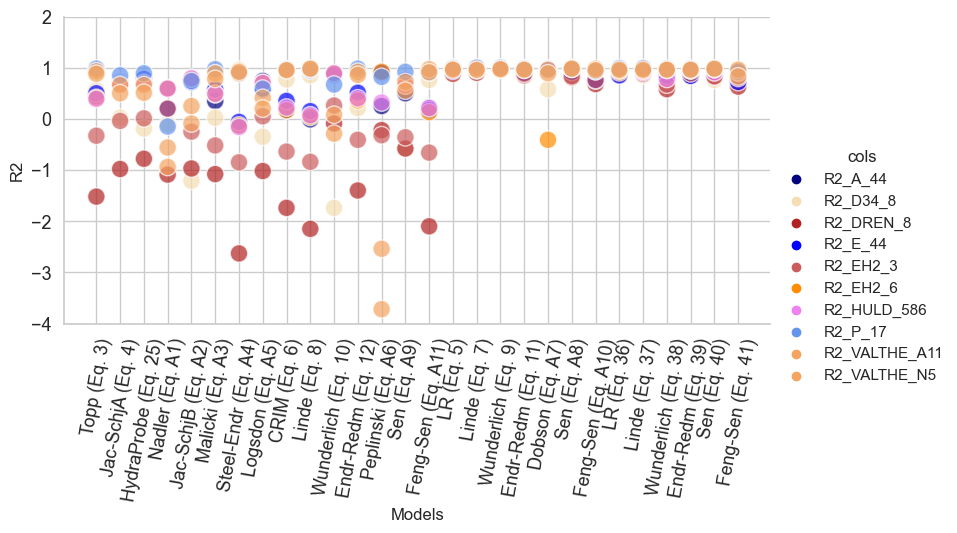

In [14]:
hue_colors = {'R2_A_44': 'navy',
              'R2_D34_8': 'wheat',
              'R2_DREN_8': 'firebrick',
              'R2_E_44': 'blue',
              'R2_EH2_3': 'indianred',
              'R2_EH2_6': 'darkorange',
              'R2_HULD_586': 'violet',
              'R2_P_17': 'cornflowerblue',
              'R2_VALTHE_A11': 'sandybrown',
              'R2_VALTHE_N5': 'sandybrown'    } 

er = R2.loc[:, ['Models',  'R2_A_44', 'R2_D34_8',   'R2_DREN_8',  'R2_E_44', 'R2_EH2_3', 'R2_EH2_6', 
                  'R2_HULD_586', 'R2_P_17', 'R2_VALTHE_A11' , 'R2_VALTHE_N5'        ]]

er.loc['Peplinski (Eq. A6)', 'R2_D34_8'] = np.nan         # Delete outlier just for visualization

dfm = er.melt('Models', var_name='cols', value_name='R2')
sns.set_theme(style="whitegrid")

g = sns.relplot(x="Models", y="R2", data=dfm, hue='cols', aspect = 1.6, height= 5, alpha=0.7, s=160, 
                palette=hue_colors)

g.set_xticklabels(rotation=80, size=13)
g.set_yticklabels(size=13)

g.set(ylim=(None, None))
plt.subplots_adjust(bottom=0.35)

sns.despine()
plt.savefig("fig12A", dpi=400)

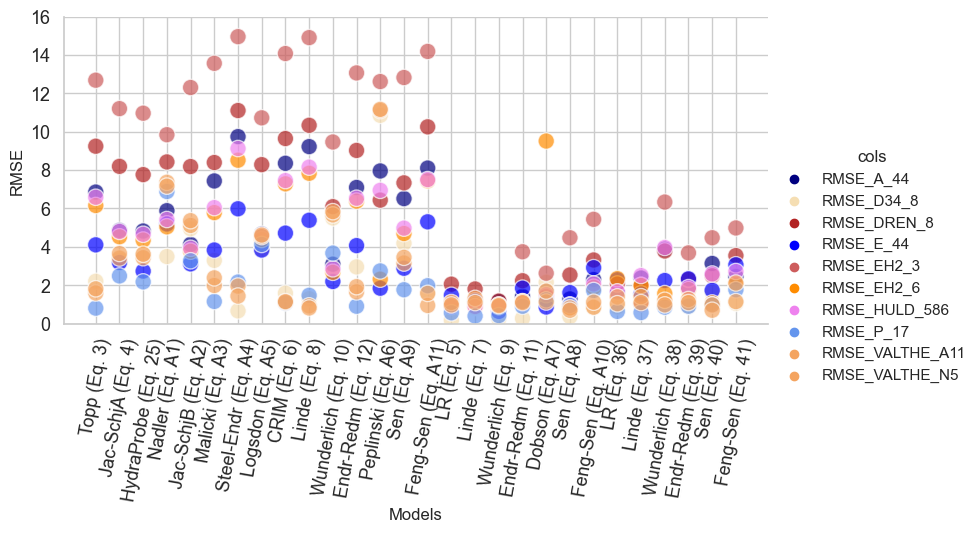

In [15]:
hue_colors = {'RMSE_A_44': 'navy',
              'RMSE_D34_8': 'wheat',
              'RMSE_DREN_8': 'firebrick',
              'RMSE_E_44': 'blue',
              'RMSE_EH2_3': 'indianred',
              'RMSE_EH2_6': 'darkorange',
              'RMSE_HULD_586': 'violet',
              'RMSE_P_17': 'cornflowerblue',
              'RMSE_VALTHE_A11': 'sandybrown',
              'RMSE_VALTHE_N5': 'sandybrown'    } 

er = RMSE.loc[:, ['Models',  'RMSE_A_44', 'RMSE_D34_8',   'RMSE_DREN_8',  'RMSE_E_44', 'RMSE_EH2_3', 'RMSE_EH2_6', 
                  'RMSE_HULD_586', 'RMSE_P_17', 'RMSE_VALTHE_A11' , 'RMSE_VALTHE_N5'        ]]

dfm = er.melt('Models', var_name='cols', value_name='RMSE')
sns.set_theme(style="whitegrid")

g = sns.relplot(x="Models", y="RMSE", data=dfm, hue='cols', aspect = 1.6, height= 5, alpha=0.7, s=140, 
                palette=hue_colors)

g.set_xticklabels(rotation=80, size=13)
g.set_yticklabels(size=13)

g.set(ylim=(0, None))
plt.subplots_adjust(bottom=0.35)

sns.despine()
plt.savefig("fig12B", dpi=400)

# Figure 10

logarithmic coefficients for CEC vs alpha = [0.2709775  0.30578552]
logarithmic coefficients for CEC vs m = [-0.28012675  1.76201034]


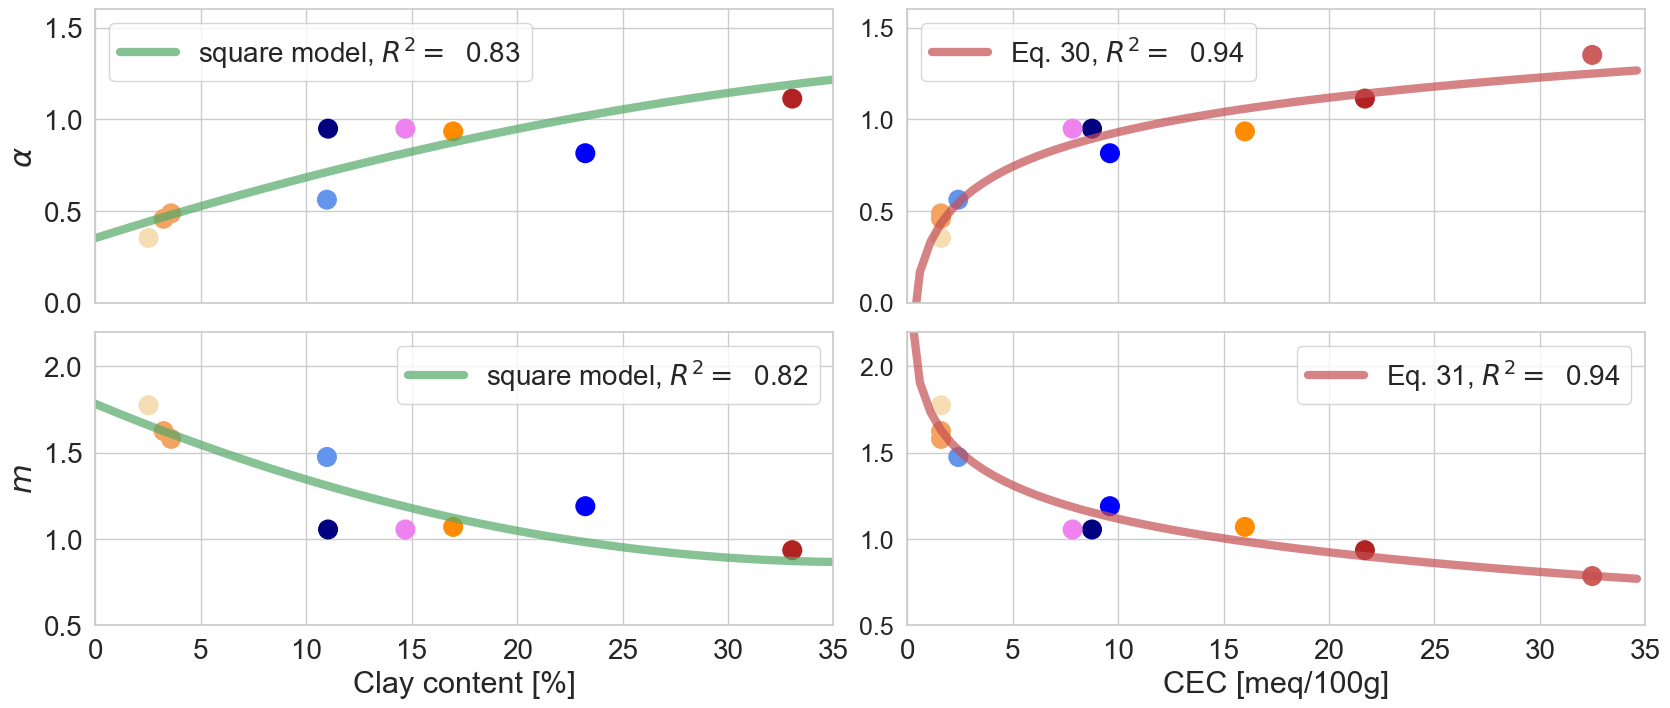

In [16]:
# Plot settings
fig10, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(20, 8))
fig10.subplots_adjust(hspace=0.1)
fig10.subplots_adjust(wspace=0.1)
lw = 6
a = 0.7
ss = 180
ms = 12
yl=1.5
cc_ = np.arange(0, 40, 0.5)
cec_ = np.arange(0.1, 35, 0.5)

########################### Calculating mepirical pedotransfer functions #####################################

fit2_clay_alpha = np.polyfit(np.array(ds.Clay[:], dtype=float), np.array(ds.Alpha[:], dtype=float), 2)
pred2_clay_alpha = fit2_clay_alpha[-1] + fit2_clay_alpha[-2]*cc_ + fit2_clay_alpha[-3]*cc_*cc_
pred2r2_clay_alpha =       r2_score(ds.Alpha[:], fit2_clay_alpha[-1] + fit2_clay_alpha[-2]*ds.Clay[:] + fit2_clay_alpha[-3]*ds.Clay[:]*ds.Clay[:])

fit_cec_alpha_lg = np.polyfit(np.log(np.array(ds.CEC[:]).astype(float)), np.array(ds.Alpha[:], dtype=float), 1)
print("logarithmic coefficients for CEC vs alpha =", fit_cec_alpha_lg)
predlg_cec_alpha =     fit_cec_alpha_lg[-1] + fit_cec_alpha_lg[-2]*np.log(cec_)
r2_cec_alpha_lg =       r2_score(ds.Alpha[:], fit_cec_alpha_lg[-1] + fit_cec_alpha_lg[-2]*np.log(np.array(ds.CEC[:]).astype(float)))

fit2_clay_m = np.polyfit(np.array(ds.Clay[:], dtype=float), np.array(ds.m_linde[:], dtype=float), 2)
pred2_clay_m = fit2_clay_m[-1] + fit2_clay_m[-2]*cc_ + fit2_clay_m[-3]*cc_*cc_
pred2r2_clay_m =       r2_score(ds.m_linde[:], fit2_clay_m[-1] + fit2_clay_m[-2]*ds.Clay[:] + fit2_clay_m[-3]*ds.Clay[:]*ds.Clay[:])

fit_cec_m_lg = np.polyfit(np.log(np.array(ds.CEC[:]).astype(float)), np.array(ds.m_linde[:], dtype=float), 1)
print("logarithmic coefficients for CEC vs m =", fit_cec_m_lg)
predlg_cec_m =     fit_cec_m_lg[-1] + fit_cec_m_lg[-2]*np.log(cec_)
r2_cec_m_lg =       r2_score(ds.m_linde[:], fit_cec_m_lg[-1] + fit_cec_m_lg[-2]*np.log(np.array(ds.CEC[:]).astype(float)))


########################### Plotting data and empirical pedotransfer functions #####################################

colors = ['navy', 'firebrick', 'wheat', 'indianred', 'darkorange', 'blue', 'violet', 'cornflowerblue', 'sandybrown','sandybrown']

ax1.plot(   cc_,                 pred2_clay_alpha, c='g',  linewidth=lw,   alpha=a, label='square model, ${R^2}=$  '+str("{:.2f}".format(pred2r2_clay_alpha)))
ax1.scatter(ds.Clay[:], ds.Alpha[:], c=colors, s=ss)

ax2.plot(   cec_,                 predlg_cec_alpha, c='r', alpha=a,  linewidth=lw,   label='Eq. 30, ${R^2}=$  '+str("{:.2f}".format(r2_cec_alpha_lg)))
ax2.scatter(ds.CEC[:], ds.Alpha[:],  c=colors,    s=ss)

ax3.plot(   cc_,                 pred2_clay_m, c='g',  alpha=a,  linewidth=lw,  label='square model, ${R^2}=$  '+str("{:.2f}".format(pred2r2_clay_m)))
ax3.scatter(ds.Clay[:], ds.m_linde[:], c=colors, s=ss)

ax4.plot(   cec_,                 predlg_cec_m, c='r', alpha=a,  linewidth=lw,   label='Eq. 31, ${R^2}=$  '+str("{:.2f}".format(r2_cec_m_lg)))
ax4.scatter(ds.CEC[:], ds.m_linde[:],  c=colors,  s=ss)


plots.fig10(ax1, ax2, ax3, ax4)
plt.savefig("fig10", dpi=400)

# Figure 11

logarithmic coefficients for CEC vs L Sen = [-0.18601912  0.56501395]
logarithmic coefficients for CEC vs L Feng Sen = [-0.19318169  0.4399905 ]
logarithmic coefficients for CEC vs L Endres Redman = [-0.19437279  0.47214844]
logarithmic coefficients for CEC vs Lw = [-0.04927471  0.12787182]


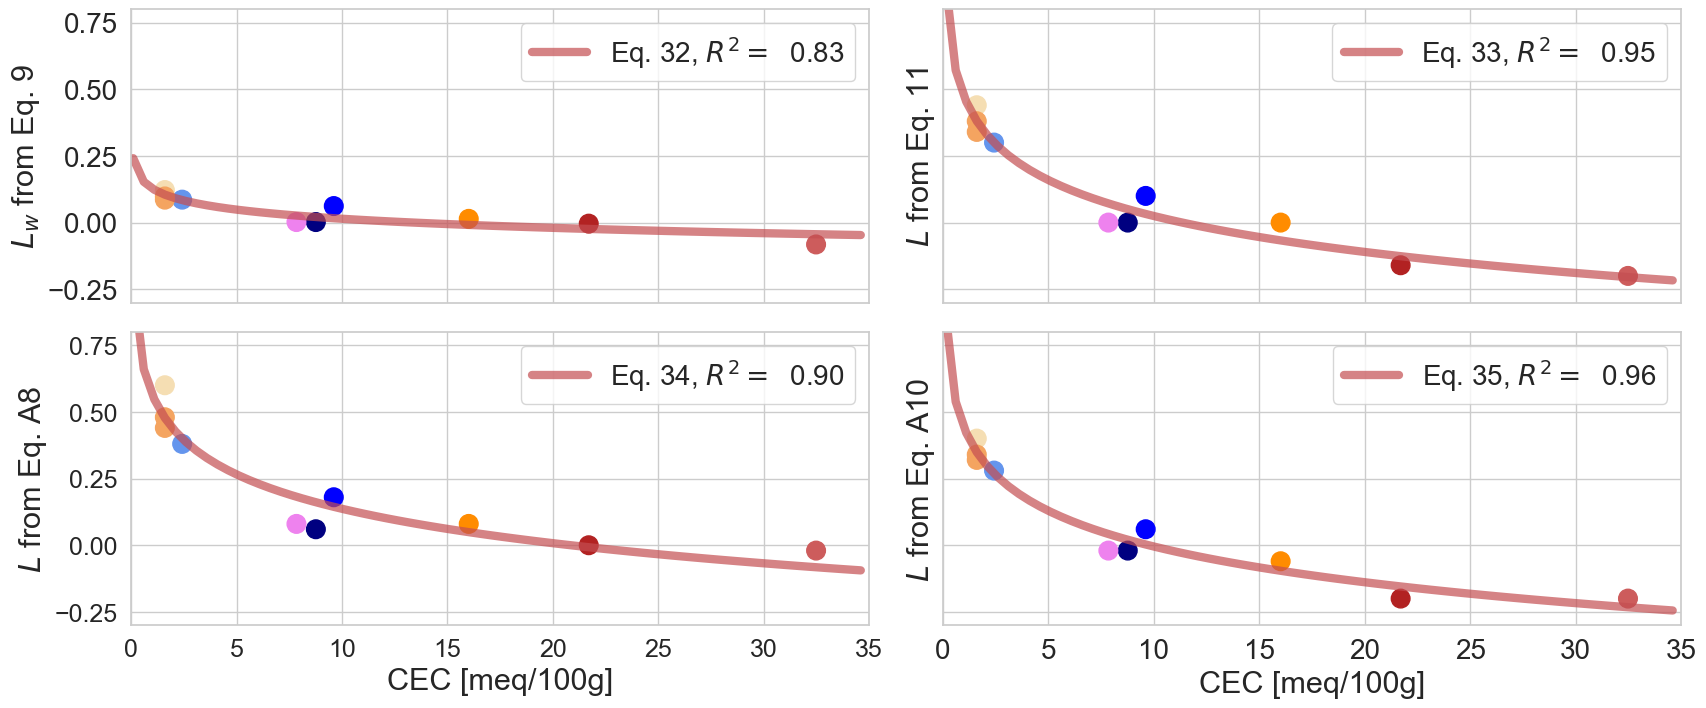

In [17]:
fig11, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(20, 8))

lw = 6
a = 0.7
ss = 180
fig11.subplots_adjust(hspace=0.1)
fig11.subplots_adjust(wspace=0.1)

fit_cec_Lsen = np.polyfit(np.log(np.array(ds.CEC[:]).astype(float)), np.array(ds.L_Sen[:], dtype=float), 1)
print("logarithmic coefficients for CEC vs L Sen =", fit_cec_Lsen)
pred_cec_Lsen =     fit_cec_Lsen[-1] + fit_cec_Lsen[-2]*np.log(cec_)
r2_cec_Lsen =       r2_score(ds.L_Sen[:], fit_cec_Lsen[-1] + fit_cec_Lsen[-2]*np.log(np.array(ds.CEC[:]).astype(float)))

fit_cec_Lfengsen = np.polyfit(np.log(np.array(ds.CEC[:]).astype(float)), np.array(ds.L_FengSen[:], dtype=float), 1)
print("logarithmic coefficients for CEC vs L Feng Sen =", fit_cec_Lfengsen)
pred_cec_Lfengsen =     fit_cec_Lfengsen[-1] + fit_cec_Lfengsen[-2]*np.log(cec_)
r2_cec_Lfengsen =       r2_score(ds.L_FengSen[:], fit_cec_Lfengsen[-1] + fit_cec_Lfengsen[-2]*np.log(np.array(ds.CEC[:]).astype(float)))

fit_cec_EndresRedman_lg = np.polyfit(np.log(np.array(ds.CEC[:]).astype(float)), np.array(ds.L_EndresRedman[:], dtype=float), 1)
print("logarithmic coefficients for CEC vs L Endres Redman =", fit_cec_EndresRedman_lg)
predlg_cec_EndresRedman =     fit_cec_EndresRedman_lg[-1] + fit_cec_EndresRedman_lg[-2]*np.log(cec_)
r2_cec_EndresRedman_lg =       r2_score(ds.L_EndresRedman[:], fit_cec_EndresRedman_lg[-1] + fit_cec_EndresRedman_lg[-2]*np.log(np.array(ds.CEC[:]).astype(float)))


fit_cec_Lw = np.polyfit(np.log(np.array(ds.CEC[:]).astype(float)), np.array(ds.L_Wund, dtype=float), 1)
print("logarithmic coefficients for CEC vs Lw =", fit_cec_Lw)
pred_cec_Lw =     fit_cec_Lw[-1] + fit_cec_Lw[-2]*np.log(cec_)
r2_cec_Lw =       r2_score(ds.L_Wund[:], fit_cec_Lw[-1] + fit_cec_Lw[-2]*np.log(np.array(ds.CEC[:]).astype(float)))


ax3.plot(   cec_,                 pred_cec_Lsen , c='r', alpha=a, linewidth=lw,    label='Eq. 34, ${R^2}=$  '+str("{:.2f}".format(r2_cec_Lsen)))
ax3.scatter(ds.CEC[:], ds.L_Sen[:], c=colors,  s=ss)

ax4.plot(   cec_,                 pred_cec_Lfengsen , c='r', alpha=a, linewidth=lw,    label='Eq. 35, ${R^2}=$  '+str("{:.2f}".format(r2_cec_Lfengsen)))
ax4.scatter(ds.CEC[:], ds.L_FengSen[:], c=colors,  s=ss)

ax2.plot(   cec_,                 predlg_cec_EndresRedman, c='r', linewidth=lw,  alpha=a,   label='Eq. 33, ${R^2}=$  '+str("{:.2f}".format(r2_cec_EndresRedman_lg)))
ax2.scatter(ds.CEC[:], ds.L_EndresRedman[:],  c=colors,  s=ss)

ax1.plot(   cec_,                 pred_cec_Lw , c='r', alpha=a, linewidth=lw,    label='Eq. 32, ${R^2}=$  '+str("{:.2f}".format(r2_cec_Lw)))
ax1.scatter(ds.CEC[:], ds.L_Wund[:], c=colors,  s=ss)

plots.fig11(ax1, ax2, ax3, ax4)
plt.savefig("fig11", dpi=400)

In [18]:
'''                    Fieldwork results                 '''

# Defining a dataframe to save evaluation errors
Fits = pd.DataFrame(index=[ "CRIM" ,"Linde_fixed", "Endr_Redm_fixed",
                           "LR_mv", "Linde_mv", "Endr_Redm_mv"],
                    columns = ["RMSE", "R2"])

# Evaluating the models

df["partdens"] = ptf.schjonnpd(df.Clay, df.Humus)
df['WatpermT'] = ppm.malmberg_maryott(df.field_temp)

df["CRIM"] = ppm.CRIM(df.field_water/100, df.Bulk_density, df.partdens, 1.4, ps, df.WatpermT)
df["LR_mv"] = ppm.LR_mv(df.field_water/100, df.Bulk_density, df.partdens, 1.4, ps, df.WatpermT, df.CEC_meq100g)

df["linde"] = ppm.linde(df.field_water/100, df.Bulk_density, df.partdens, 1.4, ps, df.WatpermT, 1.5, 2)
df["linde_mv"] = ppm.linde_mv(df.field_water/100, df.Bulk_density, df.partdens, 1.4, ps, df.WatpermT, df.CEC_meq100g)

df["endresredman_mv"]   =  ppm.endres_redman_mv(df.field_water/100, df.Bulk_density, df.partdens, 1.4, ps, df.WatpermT, df.CEC_meq100g)
df["endresredman"]      =  ppm.endres_redman(df.field_water/100, df.Bulk_density, df.partdens, 1.4, ps, df.WatpermT, 0.3)
    
# Error evaluation
Fits.at["CRIM", "R2"] = r2_score(df.CRIM, df.field_realperm)
Fits.at["LR_mv", "R2"] = r2_score(df.LR_mv, df.field_realperm)

Fits.at["Linde_mv", "R2"] = r2_score(df.linde_mv, df.field_realperm)
Fits.at["Linde_fixed", "R2"] = r2_score(df.linde, df.field_realperm)

Fits.at["Endr_Redm_mv", "R2"] = r2_score(df.endresredman_mv, df.field_realperm)
Fits.at["Endr_Redm_fixed", "R2"] = r2_score(df.endresredman, df.field_realperm)

Fits.at["CRIM", "RMSE"] = math.sqrt(mse(df.field_realperm, df.CRIM))
Fits.at["LR_mv", "RMSE"] = math.sqrt(mse(df.field_realperm, df.LR_mv))

Fits.at["Linde_mv", "RMSE"] = math.sqrt(mse(df.field_realperm, df.linde_mv))
Fits.at["Linde_fixed", "RMSE"] = math.sqrt(mse(df.field_realperm, df.linde))

Fits.at["Endr_Redm_fixed", "RMSE"] = math.sqrt(mse(df.field_realperm, df.endresredman))
Fits.at["Endr_Redm_mv", "RMSE"] = math.sqrt(mse(df.field_realperm, df.endresredman_mv))

# Figure 13

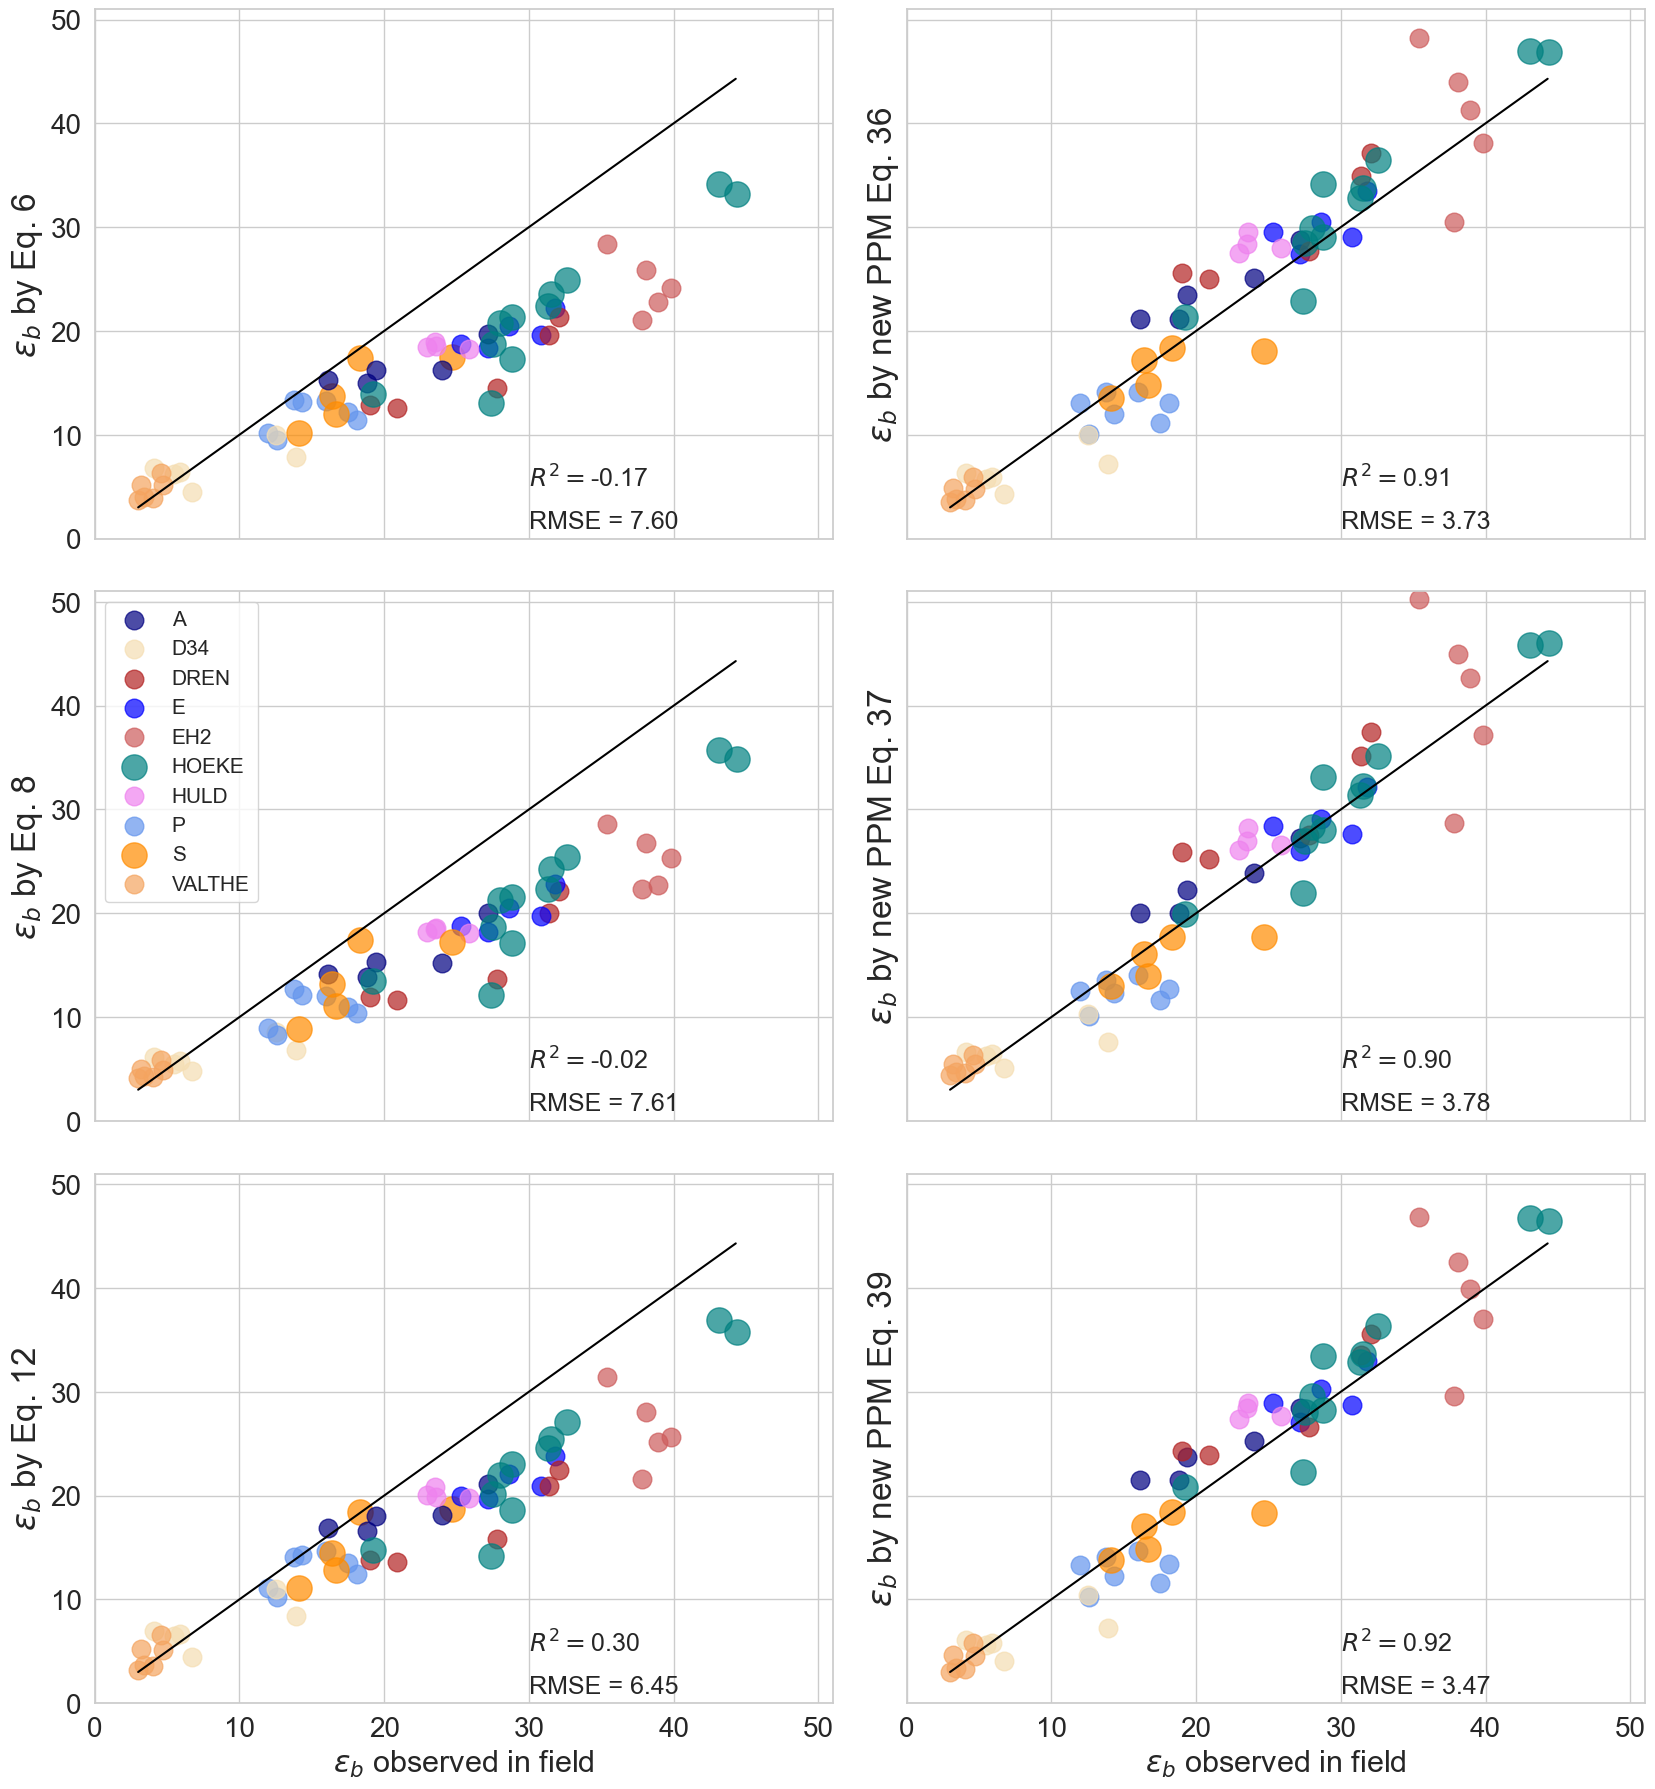

In [19]:
"""                                     Field data graph                             """

fig13, ((fx1, fx2), (fx3, fx4), (fx5, fx6)) = plt.subplots(3, 2, sharex=True, sharey=True,  figsize=(20, 22))
fig13.subplots_adjust(hspace=0.1)
fig13.subplots_adjust(wspace=0.1)

x = np.arange(df.field_realperm.min(), df.field_realperm.max(), df.field_realperm.max()/100)
ss = 330
s = 180
ft = 18
a = 0.7
hp = 30

fx3.plot(x, x, c = "black")
fx3.scatter(df.field_realperm[df['SAMPLE'].str.startswith("A")], df.linde[df['SAMPLE'].str.startswith("A")], alpha=a, s=s, c = "navy", label = 'A')
fx3.scatter(df.field_realperm[df['SAMPLE'].str.startswith("D34")], df.linde[df['SAMPLE'].str.startswith("D34")], alpha=a,  s=s, c = "wheat", label = 'D34')
fx3.scatter(df.field_realperm[df['SAMPLE'].str.startswith("DREN_")], df.linde[df['SAMPLE'].str.startswith("DREN_")],alpha=a,  s=s,  c = "firebrick", label = 'DREN')
fx3.scatter(df.field_realperm[df['SAMPLE'].str.startswith("E_")], df.linde[df['SAMPLE'].str.startswith("E_")], alpha=a, s=s, c = "blue", label = 'E')
fx3.scatter(df.field_realperm[df['SAMPLE'].str.startswith("EH2_")], df.linde[df['SAMPLE'].str.startswith("EH2_")], alpha=a,  s=s, c = "indianred", label = 'EH2')
fx3.scatter(df.field_realperm[df['SAMPLE'].str.startswith("HOEKE")], df.linde[df['SAMPLE'].str.startswith("HOEKE")], alpha=a, s=ss, c = "teal", label = 'HOEKE')
fx3.scatter(df.field_realperm[df['SAMPLE'].str.startswith("HULD_")], df.linde[df['SAMPLE'].str.startswith("HULD_")], alpha=a, s=s, c = 'violet', label = 'HULD')
fx3.scatter(df.field_realperm[df['SAMPLE'].str.startswith("P")], df.linde[df['SAMPLE'].str.startswith("P")], alpha=a, s=s, c = "cornflowerblue", label = 'P')
fx3.scatter(df.field_realperm[df['SAMPLE'].str.startswith("S")], df.linde[df['SAMPLE'].str.startswith("S")], alpha=a, s=ss, c = "darkorange", label = 'S')
fx3.scatter(df.field_realperm[df['SAMPLE'].str.startswith("V")], df.linde[df['SAMPLE'].str.startswith("V")], alpha=a, s=s, c = "sandybrown", label = 'VALTHE')
fx3.set_ylabel('${ε_b}$ by Eq. 8', fontsize = 24)
fx3.text(hp, 1, 'RMSE = '+str("{:.2f}".format(Fits.RMSE.Linde_fixed)), fontsize=ft)
fx3.text(hp, 5, '${R^2}=$'+str("{:.2f}".format(Fits.R2.Linde_fixed)), fontsize=ft)


fx1.plot(x, x, c = "black")
#fx1.set_title("Classic model" , fontweight='bold', fontsize=25) 
fx1.scatter(df.field_realperm[df['SAMPLE'].str.startswith("P")], df.CRIM[df['SAMPLE'].str.startswith("P")], alpha=a, s=s, c = "cornflowerblue", label = 'P')
fx1.scatter(df.field_realperm[df['SAMPLE'].str.startswith("S")], df.CRIM[df['SAMPLE'].str.startswith("S")],  alpha=a, s=ss,c = "darkorange", label = 'S')
fx1.scatter(df.field_realperm[df['SAMPLE'].str.startswith("E_")], df.CRIM[df['SAMPLE'].str.startswith("E_")], alpha=a, s=s, c = "blue", label = 'E')
fx1.scatter(df.field_realperm[df['SAMPLE'].str.startswith("A")], df.CRIM[df['SAMPLE'].str.startswith("A")], alpha=a, s=s, c = "navy", label = 'A')
fx1.scatter(df.field_realperm[df['SAMPLE'].str.startswith("D34")], df.CRIM[df['SAMPLE'].str.startswith("D34")],  alpha=a, s=s, c = "wheat", label = 'D34')
fx1.scatter(df.field_realperm[df['SAMPLE'].str.startswith("DREN_")], df.CRIM[df['SAMPLE'].str.startswith("DREN_")], alpha=a, s=s,  c = "firebrick", label = 'DREN')
fx1.scatter(df.field_realperm[df['SAMPLE'].str.startswith("V")], df.CRIM[df['SAMPLE'].str.startswith("V")], alpha=a, s=s, c = "sandybrown", label = 'VALTHE')
fx1.scatter(df.field_realperm[df['SAMPLE'].str.startswith("HOEKE")], df.CRIM[df['SAMPLE'].str.startswith("HOEKE")], alpha=a, s=ss, c = "teal", label = 'HOEKE')
fx1.scatter(df.field_realperm[df['SAMPLE'].str.startswith("HULD_")], df.CRIM[df['SAMPLE'].str.startswith("HULD_")], alpha=a, s=s, c = 'violet', label = 'HULD_d')
fx1.scatter(df.field_realperm[df['SAMPLE'].str.startswith("EH2_")], df.CRIM[df['SAMPLE'].str.startswith("EH2_")],  alpha=a, s=s, c = "indianred", label = 'EH2_')
fx1.set_ylabel('${ε_b}$ by Eq. 6', fontsize = 24)
fx1.text(hp, 1, 'RMSE = '+str("{:.2f}".format(Fits.RMSE.CRIM)), fontsize=ft)
fx1.text(hp, 5, '${R^2}=$'+str("{:.2f}".format(Fits.R2.CRIM)), fontsize=ft)


fx5.plot(x, x, c = "black")
#fx5.set_title("Sen" , fontweight='bold', fontsize=25) 
fx5.scatter(df.field_realperm[df['SAMPLE'].str.startswith("P")], df.endresredman[df['SAMPLE'].str.startswith("P")], alpha=a, s=s, c = "cornflowerblue", label = 'P')
fx5.scatter(df.field_realperm[df['SAMPLE'].str.startswith("S")], df.endresredman[df['SAMPLE'].str.startswith("S")], alpha=a, s=ss, c = "darkorange", label = 'S')
fx5.scatter(df.field_realperm[df['SAMPLE'].str.startswith("E_")], df.endresredman[df['SAMPLE'].str.startswith("E_")],alpha=a, s=s,  c = "blue", label = 'E')
fx5.scatter(df.field_realperm[df['SAMPLE'].str.startswith("A")], df.endresredman[df['SAMPLE'].str.startswith("A")], alpha=a, s=s, c = "navy", label = 'A')
fx5.scatter(df.field_realperm[df['SAMPLE'].str.startswith("D34")], df.endresredman[df['SAMPLE'].str.startswith("D34")],  alpha=a, s=s, c = "wheat", label = 'D34')
fx5.scatter(df.field_realperm[df['SAMPLE'].str.startswith("DREN_")], df.endresredman[df['SAMPLE'].str.startswith("DREN_")],  alpha=a, s=s, c = "firebrick", label = 'DREN')
fx5.scatter(df.field_realperm[df['SAMPLE'].str.startswith("V")], df.endresredman[df['SAMPLE'].str.startswith("V")], alpha=a, s=s, c = "sandybrown", label = 'VALTHE')
fx5.scatter(df.field_realperm[df['SAMPLE'].str.startswith("HOEKE")], df.endresredman[df['SAMPLE'].str.startswith("HOEKE")], alpha=a, s=ss, c = "teal", label = 'HOEKE')
fx5.scatter(df.field_realperm[df['SAMPLE'].str.startswith("HULD_")], df.endresredman[df['SAMPLE'].str.startswith("HULD_")], alpha=a, s=s, c = 'violet', label = 'HULD_d')
fx5.scatter(df.field_realperm[df['SAMPLE'].str.startswith("EH2_")], df.endresredman[df['SAMPLE'].str.startswith("EH2_")], alpha=a, s=s,  c = "indianred", label = 'EH2_')
fx5.set_ylabel('${ε_b}$ by Eq. 12', fontsize = 24)
fx5.text(hp, 1, 'RMSE = '+str("{:.2f}".format(Fits.RMSE.Endr_Redm_fixed)), fontsize=ft)
fx5.text(hp, 5, '${R^2}=$'+str("{:.2f}".format(Fits.R2.Endr_Redm_fixed)), fontsize=ft)

fx2.plot(x, x, c = "black")
fx4.plot(x, x, c = "black")
fx6.plot(x, x, c = "black")

fx6.scatter(df.field_realperm[df['SAMPLE'].str.startswith("P")], df.endresredman_mv[df['SAMPLE'].str.startswith("P")], alpha=a, s=s, c = "cornflowerblue", label = 'P')
fx6.scatter(df.field_realperm[df['SAMPLE'].str.startswith("S")], df.endresredman_mv[df['SAMPLE'].str.startswith("S")], alpha=a, s=ss, c = "darkorange", label = 'S')
fx6.scatter(df.field_realperm[df['SAMPLE'].str.startswith("E_")], df.endresredman_mv[df['SAMPLE'].str.startswith("E_")], alpha=a, s=s, c = "blue", label = 'E')
fx6.scatter(df.field_realperm[df['SAMPLE'].str.startswith("A")], df.endresredman_mv[df['SAMPLE'].str.startswith("A")], alpha=a, s=s, c = "navy", label = 'A')
fx6.scatter(df.field_realperm[df['SAMPLE'].str.startswith("D34")], df.endresredman_mv[df['SAMPLE'].str.startswith("D34")], alpha=a, s=s,  c = "wheat", label = 'D34')
fx6.scatter(df.field_realperm[df['SAMPLE'].str.startswith("DREN_")], df.endresredman_mv[df['SAMPLE'].str.startswith("DREN_")],  alpha=a, s=s, c = "firebrick", label = 'DREN')
fx6.scatter(df.field_realperm[df['SAMPLE'].str.startswith("V")], df.endresredman_mv[df['SAMPLE'].str.startswith("V")], alpha=a, s=s, c = "sandybrown", label = 'VALTHE')
fx6.scatter(df.field_realperm[df['SAMPLE'].str.startswith("HOEKE")], df.endresredman_mv[df['SAMPLE'].str.startswith("HOEKE")], alpha=a, s=ss, c = "teal", label = 'HOEKE')
fx6.scatter(df.field_realperm[df['SAMPLE'].str.startswith("HULD_")], df.endresredman_mv[df['SAMPLE'].str.startswith("HULD_")], alpha=a, s=s, c = 'violet', label = 'HULD_d')
fx6.scatter(df.field_realperm[df['SAMPLE'].str.startswith("EH2_")], df.endresredman_mv[df['SAMPLE'].str.startswith("EH2_")], alpha=a, s=s,  c = "indianred", label = 'EH2_')
fx6.text(hp, 1, 'RMSE = '+str("{:.2f}".format(Fits.RMSE.Endr_Redm_mv)), fontsize=ft)
fx6.text(hp, 5, '${R^2}=$'+str("{:.2f}".format(Fits.R2.Endr_Redm_mv)), fontsize=ft)

fx2.scatter(df.field_realperm[df['SAMPLE'].str.startswith("P")], df.LR_mv[df['SAMPLE'].str.startswith("P")],alpha=a, s=s,  c = "cornflowerblue", label = 'P')
fx2.scatter(df.field_realperm[df['SAMPLE'].str.startswith("S")], df.LR_mv[df['SAMPLE'].str.startswith("S")],alpha=a,  s=ss, c = "darkorange", label = 'S')
fx2.scatter(df.field_realperm[df['SAMPLE'].str.startswith("E_")], df.LR_mv[df['SAMPLE'].str.startswith("E_")], alpha=a, s=s, c = "blue", label = 'E')
fx2.scatter(df.field_realperm[df['SAMPLE'].str.startswith("A")], df.LR_mv[df['SAMPLE'].str.startswith("A")], alpha=a, s=s, c = "navy", label = 'A')
fx2.scatter(df.field_realperm[df['SAMPLE'].str.startswith("D34")], df.LR_mv[df['SAMPLE'].str.startswith("D34")],  alpha=a, s=s, c = "wheat", label = 'D34')
fx2.scatter(df.field_realperm[df['SAMPLE'].str.startswith("DREN_")], df.LR_mv[df['SAMPLE'].str.startswith("DREN_")], alpha=a,  s=s, c = "firebrick", label = 'DREN')
fx2.scatter(df.field_realperm[df['SAMPLE'].str.startswith("V")], df.LR_mv[df['SAMPLE'].str.startswith("V")],alpha=a,  s=s, c = "sandybrown", label = 'VALTHE')
fx2.scatter(df.field_realperm[df['SAMPLE'].str.startswith("HOEKE")], df.LR_mv[df['SAMPLE'].str.startswith("HOEKE")], alpha=a, s=ss, c = "teal", label = 'HOEKE')
fx2.scatter(df.field_realperm[df['SAMPLE'].str.startswith("HULD_")], df.LR_mv[df['SAMPLE'].str.startswith("HULD_")], alpha=a, s=s, c = 'violet', label = 'HULD_d')
fx2.scatter(df.field_realperm[df['SAMPLE'].str.startswith("EH2_")], df.LR_mv[df['SAMPLE'].str.startswith("EH2_")], alpha=a,  s=s, c = "indianred", label = 'EH2_')
fx2.text(hp, 1, 'RMSE = '+str("{:.2f}".format(Fits.RMSE.LR_mv)), fontsize=ft)
fx2.text(hp, 5, '${R^2}=$'+str("{:.2f}".format(Fits.R2.LR_mv)), fontsize=ft)

fx4.scatter(df.field_realperm[df['SAMPLE'].str.startswith("P")], df.linde_mv[df['SAMPLE'].str.startswith("P")],alpha=a, s=s,  c = "cornflowerblue", label = 'P')
fx4.scatter(df.field_realperm[df['SAMPLE'].str.startswith("S")], df.linde_mv[df['SAMPLE'].str.startswith("S")], alpha=a, s=ss, c = "darkorange", label = 'S')
fx4.scatter(df.field_realperm[df['SAMPLE'].str.startswith("E_")], df.linde_mv[df['SAMPLE'].str.startswith("E_")], alpha=a, s=s, c = "blue", label = 'E')
fx4.scatter(df.field_realperm[df['SAMPLE'].str.startswith("A")], df.linde_mv[df['SAMPLE'].str.startswith("A")],alpha=a,  s=s, c = "navy", label = 'A')
fx4.scatter(df.field_realperm[df['SAMPLE'].str.startswith("D34")], df.linde_mv[df['SAMPLE'].str.startswith("D34")], alpha=a, s=s,  c = "wheat", label = 'D34')
fx4.scatter(df.field_realperm[df['SAMPLE'].str.startswith("DREN_")], df.linde_mv[df['SAMPLE'].str.startswith("DREN_")], alpha=a, s=s,  c = "firebrick", label = 'DREN')
fx4.scatter(df.field_realperm[df['SAMPLE'].str.startswith("V")], df.linde_mv[df['SAMPLE'].str.startswith("V")], alpha=a, s=s, c = "sandybrown", label = 'VALTHE')
fx4.scatter(df.field_realperm[df['SAMPLE'].str.startswith("HOEKE")], df.linde_mv[df['SAMPLE'].str.startswith("HOEKE")], alpha=a, s=ss, c = "teal", label = 'HOEKE')
fx4.scatter(df.field_realperm[df['SAMPLE'].str.startswith("HULD_")], df.linde_mv[df['SAMPLE'].str.startswith("HULD_")], alpha=a, s=s, c = 'violet', label = 'HULD')
fx4.scatter(df.field_realperm[df['SAMPLE'].str.startswith("EH2_")], df.linde_mv[df['SAMPLE'].str.startswith("EH2_")], alpha=a, s=s,  c = "indianred", label = 'EH2')
fx4.text(hp, 1, 'RMSE = '+str("{:.2f}".format(Fits.RMSE.Linde_mv)), fontsize=ft)
fx4.text(hp, 5, '${R^2}=$'+str("{:.2f}".format(Fits.R2.Linde_mv)), fontsize=ft)

fx2.set_ylabel('${ε_b}$ by new PPM Eq. 36', fontsize = 24)
fx4.set_ylabel('${ε_b}$ by new PPM Eq. 37', fontsize = 24)
fx6.set_ylabel('${ε_b}$ by new PPM Eq. 39', fontsize = 24)

plots.fig13(fx1, fx2, fx3, fx4, fx5, fx6)
plt.savefig("fig13", dpi=400)

# Figure 14

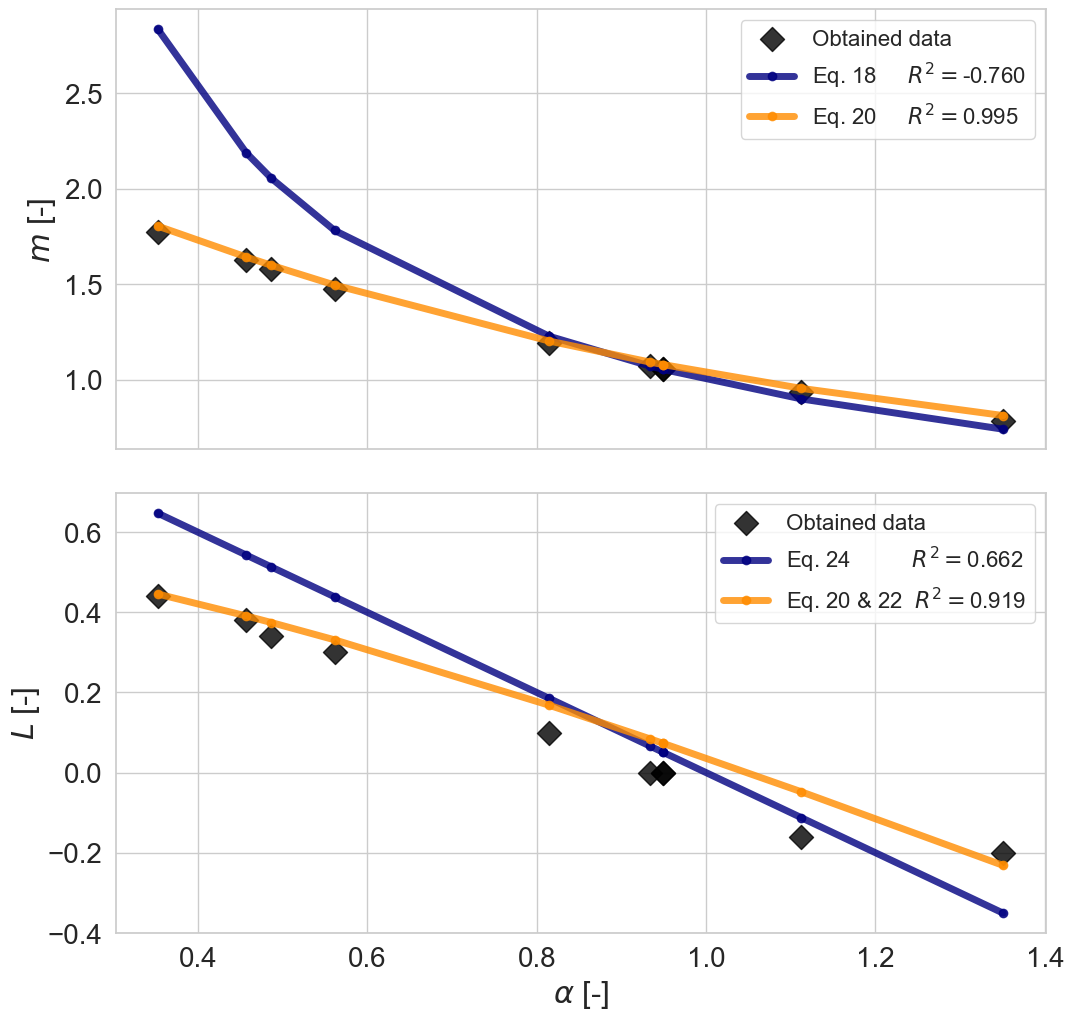

In [20]:
fig14, ((x1, x2)) = plt.subplots(2, 1,  sharex=True, figsize=(12, 12))
fig14.subplots_adjust(hspace=0.10)
a = 0.8
s = 150                                                                # marker size
lw = 5

bd = 1.4
wp = 80
offset = 3
sp = 3.7
pdn = 2.65

m_eq20 = ptf.eq20(bd, pdn, sp, wp, offset, ds.Alpha[:].values)
m_eq18 = ptf.eq18(ds.Alpha[:].values)

r2_m_eq18    = r2_score(ds.m_linde[:], m_eq18)
r2_m_eq20    = r2_score(ds.m_linde[:], m_eq20)

L_eq24 = ptf.eq24(ds.Alpha[:].values)
L_eq20_22 = ptf.eq20_22(bd, pdn, sp, wp, offset, ds.Alpha[:].values)

r2_L_eq24    = r2_score(ds.L_EndresRedman[:], L_eq24)
r2_L_eq20_22 = r2_score(ds.L_EndresRedman[:], L_eq20_22)

i = np.argsort(ds.Alpha[:])

x1.scatter(ds.Alpha[:], ds.m_linde[:] ,   s=s , marker='D',  c='black', alpha=a, label="Obtained data")
x1.plot(   np.sort(ds.Alpha[:]), m_eq18[i], c='navy', alpha=a, linewidth=lw, marker ='o', label="Eq. 18     ${R^2}=$"+str("{:.3f}".format(r2_m_eq18)))
x1.plot(   np.sort(ds.Alpha[:]), m_eq20[i] , c='darkorange', alpha=a, linewidth=lw, marker ='o', label="Eq. 20     ${R^2}=$"+str("{:.3f}".format(r2_m_eq20)))

x2.scatter( ds.Alpha[:], ds.L_EndresRedman[:] ,  s=s, marker='D', c='black', alpha=a, label='Obtained data')
x2.plot(    np.sort(ds.Alpha[:]), L_eq24[i], c='navy', alpha=a, linewidth=lw, marker ='o', label="Eq. 24          ${R^2}=$"+str("{:.3f}".format(r2_L_eq24)))
x2.plot(    np.sort(ds.Alpha[:]), L_eq20_22[i], c='darkorange', alpha=a, linewidth=lw, marker ='o', label="Eq. 20 & 22  ${R^2}=$"+str("{:.3f}".format(r2_L_eq20_22)))

plots.fig14(x1, x2)
plt.savefig("fig14", dpi=400)

# Figure 15

Standard deviation =  12.226081600192519
Mean = 27.699039599772252


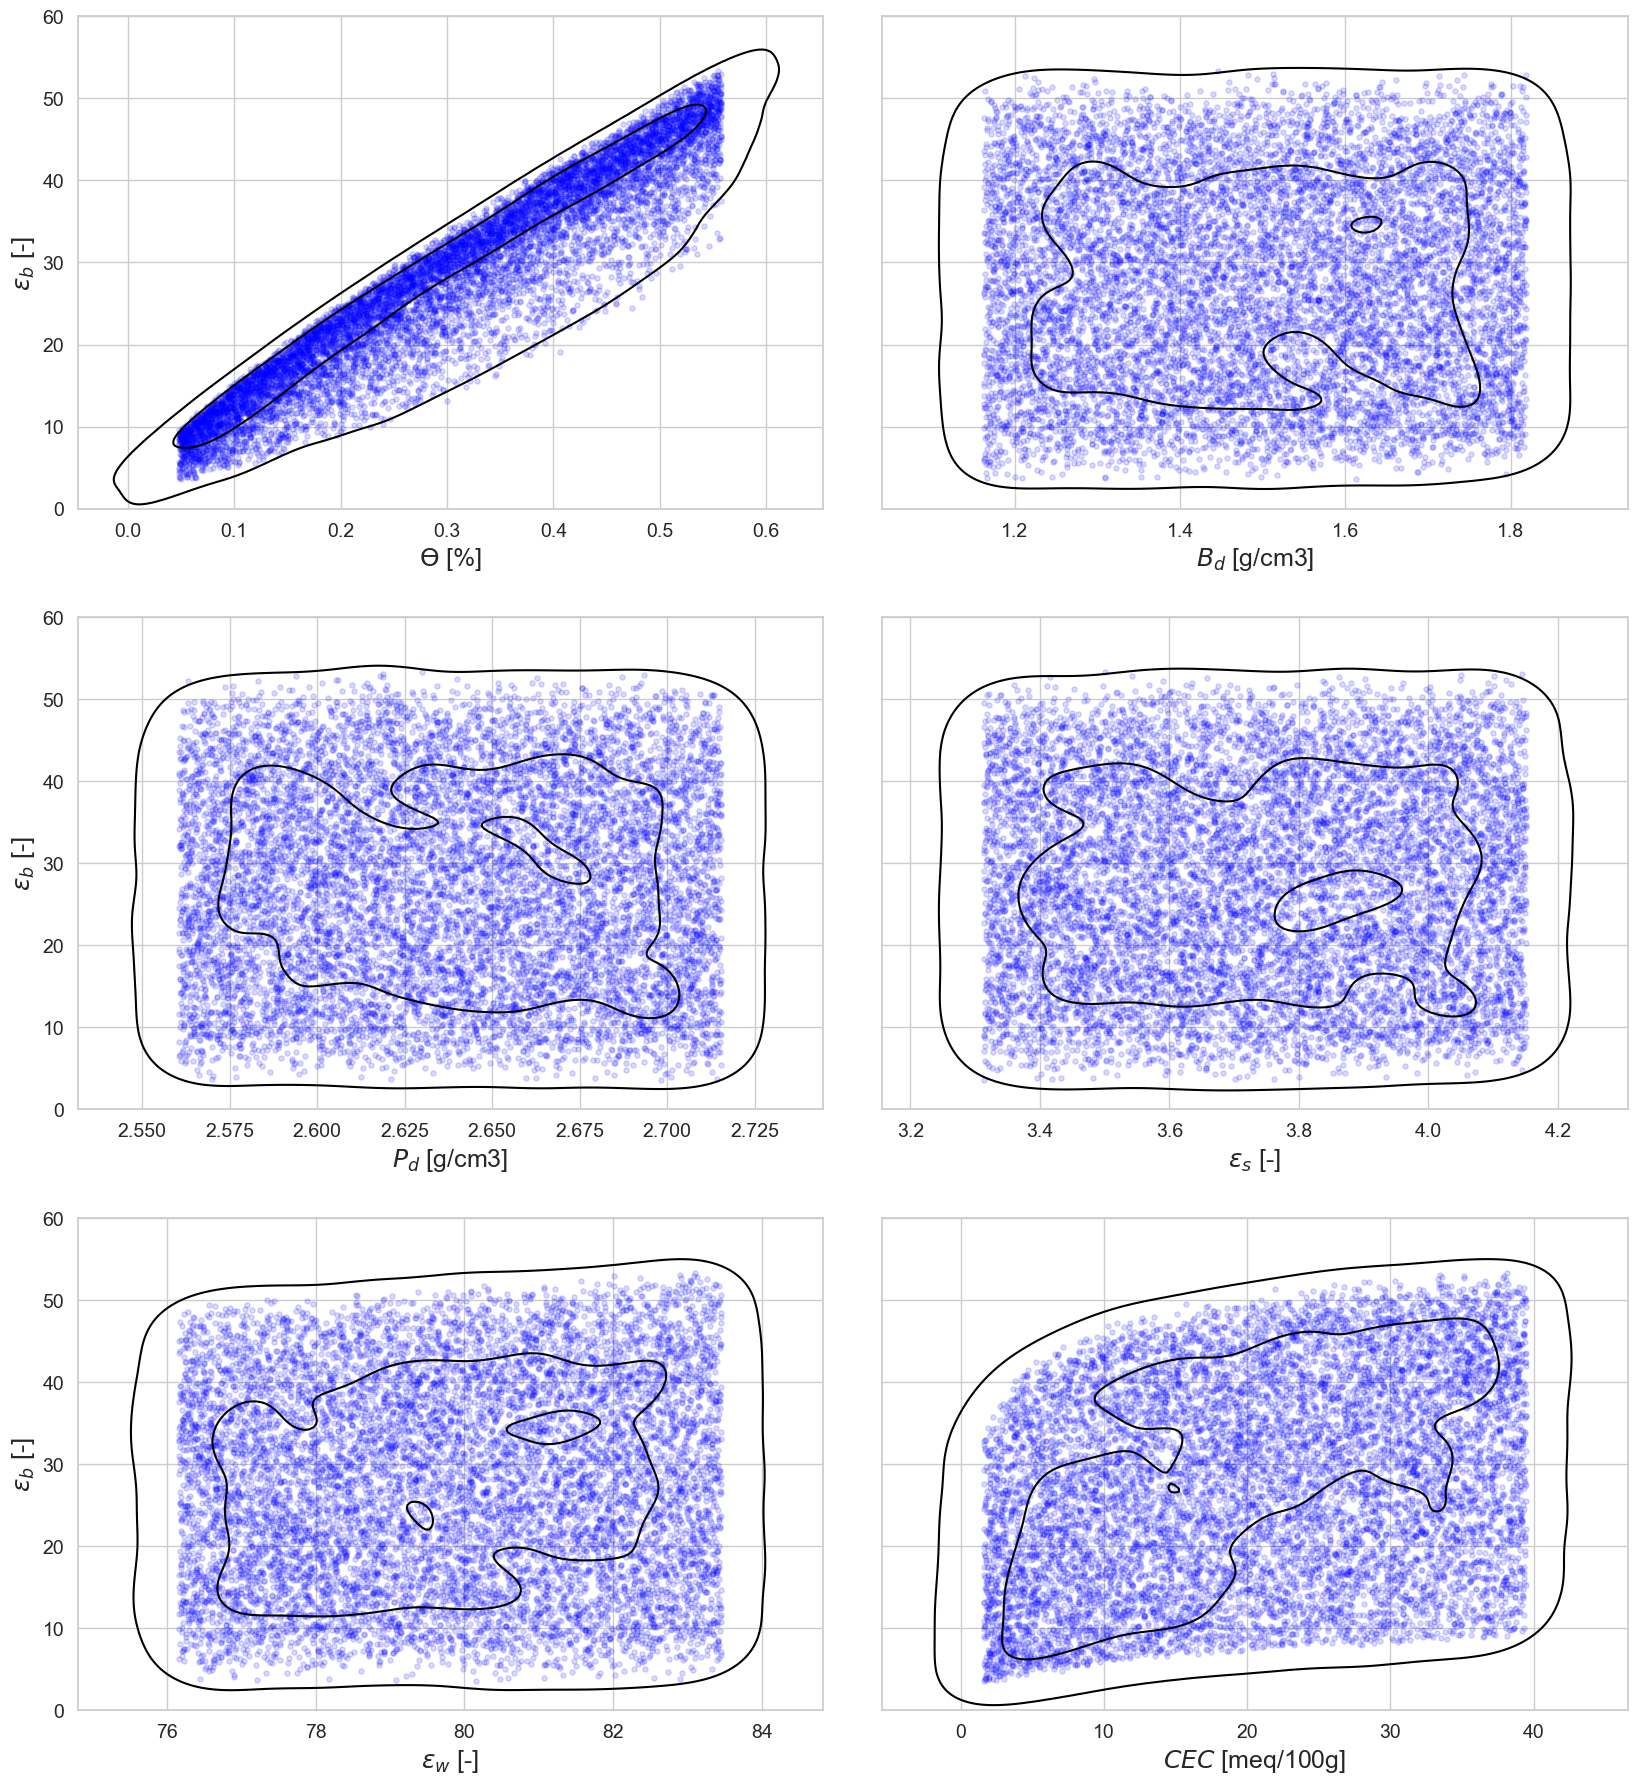

In [21]:
'''         Lists for synthetic evaluation of pedophysical models         '''
step = 10000    # Increasing to 100000 may require runtime

vmc_ = np.arange(np.min(df.field_water)/100,  np.max(df.field_water)/100 , (np.max(df.field_water)/100  - np.min(df.field_water)/100) /step)
bd_ =  np.arange(np.min(df.Bulk_density), np.max(df.Bulk_density), (np.max(df.Bulk_density) - np.min(df.Bulk_density))/step)
pd_ =  np.arange(np.min(df.partdens) ,    np.max(df.partdens) ,    (np.max(df.partdens)  -    np.min(df.partdens) )   /step)
cec_ = np.arange(np.min(df.CEC_meq100g),  np.max(df.CEC_meq100g),  (np.max(df.CEC_meq100g) -  np.min(df.CEC_meq100g) )/step)
wp_ =  np.arange(np.min(df.WatpermT) ,    np.max(df.WatpermT) ,    (np.max(df.WatpermT)  -    np.min(df.WatpermT) )   /step)
sp_ =  np.arange(np.min(df.perm_solid) ,  np.max(df.perm_solid) ,  (np.max(df.perm_solid)  -  np.min(df.perm_solid) ) /step)
ap_ =  np.ones(len(sp_))*1.3

rvmc_ = random.sample(list(vmc_),  len(vmc_))
rbd_  = random.sample(list(bd_ ),  len(bd_ ))
rpd_  = random.sample(list(pd_ ),  len(pd_ ))
rsp_  = random.sample(list(sp_ ),  len(sp_ ))
rwp_  = random.sample(list(wp_ ),  len(wp_ ))
rcec_ = random.sample(list(cec_),  len(cec_))

"""                          Figure generation                   """
fig15, ((r1, r2), (r3, r4), (r5, r6)) = plt.subplots(3, 2, sharey=True, figsize=(20, 22))
fig15.subplots_adjust(hspace=0.22)
fig15.subplots_adjust(wspace=0.08)

'''         Syntrthic evaluation         '''

lw = 2
yp = 45
a  = 0.15     # Increase for darker points 
ss = 14       # Increase for bigger points
lv = 3 
ts = 0.015

r_ = list(map(ppm.LR_mv, rvmc_, rbd_, rpd_, ap_, rsp_, rwp_, rcec_))

sns.kdeplot(x=rvmc_, y=r_, levels=lv, color="black", thresh=ts, ax=r1)
sns.kdeplot(x=rbd_,  y=r_, levels=lv, color="black", thresh=ts, ax=r2)
sns.kdeplot(x=rpd_,  y=r_, levels=lv, color="black", thresh=ts, ax=r3)
sns.kdeplot(x=rsp_,  y=r_, levels=lv, color="black", thresh=ts, ax=r4)
sns.kdeplot(x=rwp_,  y=r_, levels=lv, color="black", thresh=ts, ax=r5)
sns.kdeplot(x=rcec_, y=r_, levels=lv, color="black", thresh=ts, ax=r6)

r1.scatter(rvmc_, r_, color="blue", s=ss, alpha=a)
r2.scatter(rbd_,  r_, color="blue", s=ss, alpha=a)
r3.scatter(rpd_,  r_, color="blue", s=ss, alpha=a)
r4.scatter(rsp_,  r_, color="blue", s=ss, alpha=a)
r5.scatter(rwp_,  r_, color="blue", s=ss, alpha=a)
r6.scatter(rcec_, r_, color="blue", s=ss, alpha=a)


plots.fig15(r1, r2, r3, r4, r5, r6, yp)
plt.savefig("fig15", dpi=400)

print("Standard deviation = ", np.std(r_))
print("Mean =", np.mean(r_))

# Graphic abstract

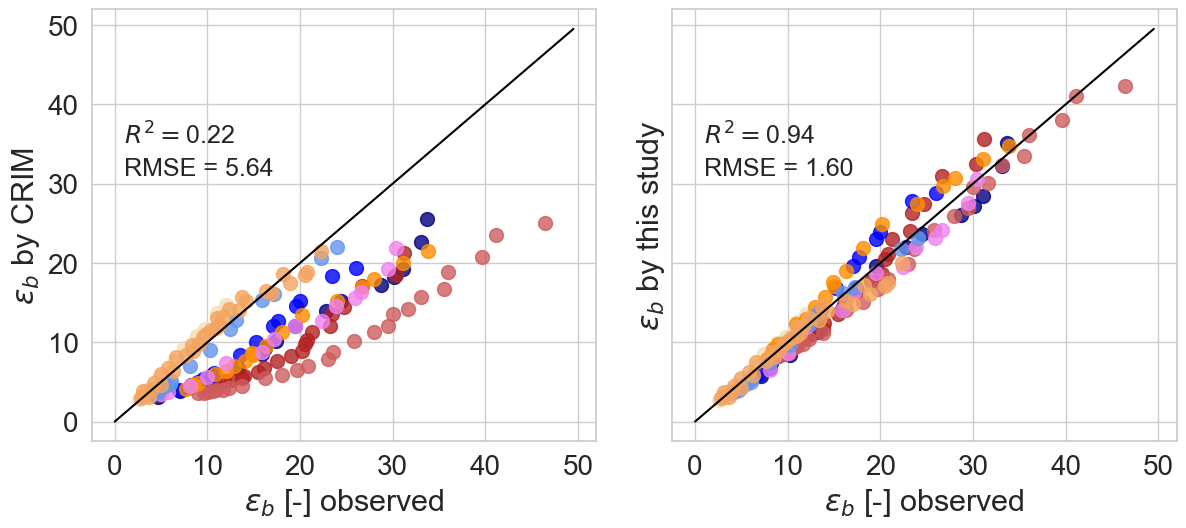

In [23]:
abst, ((x1, x2)) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 6))
#abst.subplots_adjust(hspace=0.15)
abst.subplots_adjust(wspace=0.15)

a = 0.8
s = 100
hp = 31

x = np.arange(0, 50, 50/100)

x1.plot(x, x, c = "black")

x1.scatter(dt.A_44_p, dt.CRIMA_44_p, alpha=a, s=s, c = "navy")
x1.scatter(dt.D34_8_p, dt.CRIMD34_8_p, alpha=a, s=s,  c = "wheat")
x1.scatter(dt.DREN_8_p, dt.CRIMDREN_8_p,  alpha=a, s=s, c = "firebrick")
x1.scatter(dt.E_44_p, dt.CRIME_44_p, alpha=a, s=s, c = "blue")
x1.scatter(dt.EH2_3_p, dt.CRIMEH2_3_p, alpha=a, s=s,  c = "indianred")
x1.scatter(dt.EH2_6_p, dt.CRIMEH2_6_p, alpha=a, s=s,  c ='darkorange')
x1.scatter(dt.HULD_586_p, dt.CRIMHULD_586_p, alpha=a, s=s, c = 'violet')
x1.scatter(dt.P_17_p,dt.CRIMP_17_p, alpha=a, s=s, c = "cornflowerblue")
x1.scatter(dt.VALTHE_N5_p, dt.CRIMVALTHE_N5_p, alpha=a, s=s, c = "sandybrown")
x1.scatter(dt.VALTHE_A11_p, dt.CRIMVALTHE_A11_p, alpha=a, s=s, c = "sandybrown")

x1.text(1, hp, 'RMSE = '+str("{:.2f}".format(RMSE.at['CRIM (Eq. 6)', 'Mean'])), fontsize=ft)
x1.text(1, hp+4, '${R^2}=$'+str("{:.2f}".format(R2.at['CRIM (Eq. 6)', 'Mean'])), fontsize=ft)

x2.plot(x, x, c = "black")

x2.scatter(dt.A_44_p, dt.LR_mvA_44_p, alpha=a, s=s, c = "navy")
x2.scatter(dt.D34_8_p, dt.LR_mvD34_8_p, alpha=a, s=s,  c = "wheat")
x2.scatter(dt.DREN_8_p, dt.LR_mvDREN_8_p,  alpha=a, s=s, c = "firebrick")
x2.scatter(dt.E_44_p, dt.LR_mvE_44_p, alpha=a, s=s, c = "blue")
x2.scatter(dt.EH2_6_p, dt.LR_mvEH2_6_p, alpha=a, s=s,  c = 'darkorange')
x2.scatter(dt.EH2_3_p, dt.LR_mvEH2_3_p, alpha=a, s=s,  c = "indianred")
x2.scatter(dt.HULD_586_p, dt.LR_mvHULD_586_p, alpha=a, s=s, c = 'violet')
x2.scatter(dt.P_17_p,dt.LR_mvP_17_p, alpha=a, s=s, c = "cornflowerblue")
x2.scatter(dt.VALTHE_N5_p, dt.LR_mvVALTHE_N5_p, alpha=a, s=s, c = "sandybrown")
x2.scatter(dt.VALTHE_A11_p, dt.LR_mvVALTHE_A11_p, alpha=a, s=s, c = "sandybrown")


x2.text(1, hp, 'RMSE = '+str("{:.2f}".format(RMSE.at['LR (Eq. 36)', 'Mean'])), fontsize=ft)
x2.text(1, hp+4, '${R^2}=$'+str("{:.2f}".format(R2.at['LR (Eq. 36)', 'Mean'])), fontsize=ft)

plt.subplots_adjust(bottom=0.16)

#x1.legend(loc='upper right', fontsize = 16) 
x1.tick_params(axis='y', labelsize=20) 
x1.tick_params(axis='x', labelsize=20) 
x1.set_xlabel('${ε_b}$ [-] observed', fontsize = 22) 
x1.set_ylabel('${ε_b}$ by CRIM', fontsize = 22) 
x1.grid(True) 
#x1.set_ylim(3.3, 4) 
#x1.set_xlim(3.25, 4.2)

#x2.legend(loc='upper left', fontsize = 16)
x2.tick_params(axis='y', labelsize=20) 
x2.tick_params(axis='x', labelsize=20) 
x2.set_xlabel('${ε_b}$ [-] observed', fontsize = 22) 
x2.set_ylabel('${ε_b}$ by this study', fontsize = 22) 
#x2.set_yticks(np.arange(0, -120, -3))
x2.grid(True) 
#x2.set_ylim(3.2, 4.5)  
#x2.set_xlim(3.2, 4.5)
plt.savefig("graph_abstr", dpi=400)
